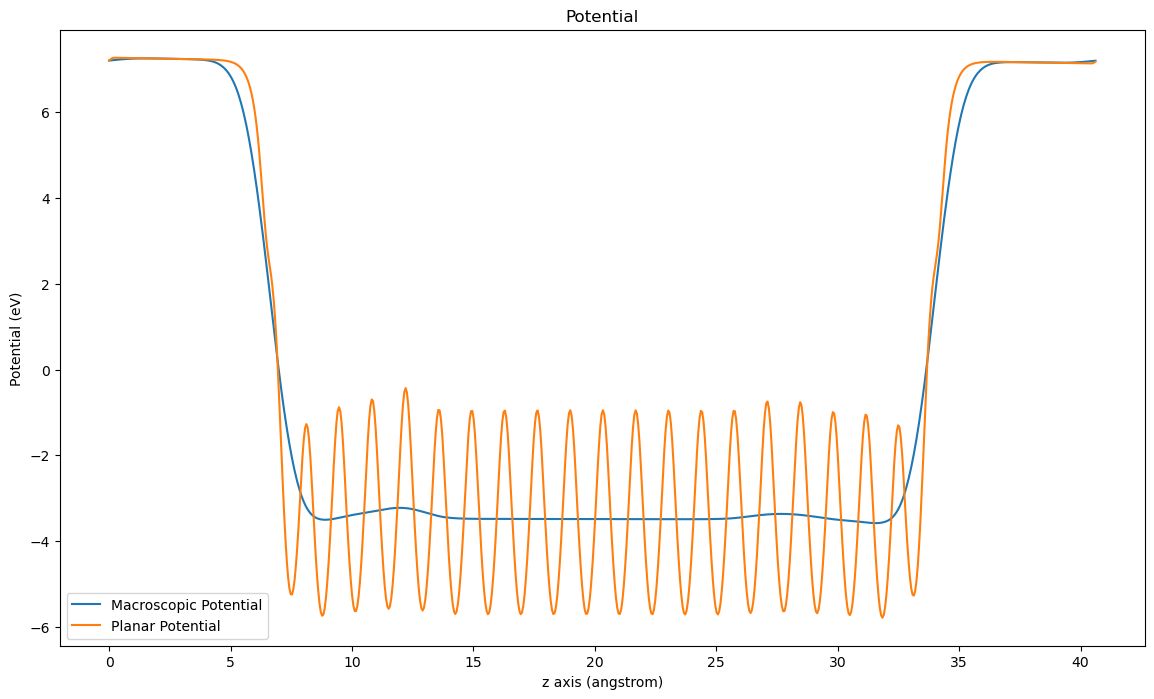

In [16]:
# For the mathematical detail, see Feliciano (2005), and Ramprasad (2006).

import matplotlib.pyplot as plt
import numpy as np


def macro_charge(dat_file_path):
    """ 
    Read the gnuplot file type, difference of 1-D macroscopic average charge density file which is an output file of VASPKIT.
    
    Args:
        file_path (string): file path (.dat: output of VASPKIT) of the difference of the charge density with + E field and - E field.
        
    Returns: 
        array: an array of coordiante and corresponding macroscopic charge density and planar averaged charge density.    
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)
    
def polarization(array_data):
    """
    Read the output of macro_charge function, and integrate the induced charge density to calculate the polarization as a function of a coordinate.

    Args:
        array_data (array): An outpout of macro_charge function.

    Returns:
        list: local polarization along one-direction.
    """
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1]) 
    return polar

def permittivity(list_data):
    """
    From Ramprasad, PRB 2006.
    
    Calculate the position dependent electric permittivity using position dependent inducded polarization.

    Args:
        list_data (list): An output of position dependent induced polarization from above equation.

    Returns:
        _type_: _description_
    """
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...
    # eps0 = (1/(4*np.pi))
    # tot_chg = 73.445
    # tot_chg = 1
    
    permitt = (0.1)/(0.1 - (np.array(list_data)/(eps0)))   # The electric field is 0.05 eV/Ang
    return permitt

induced_charge = macro_charge("../VASP_files/MACROSCOPIC_AVERAGE_pot.dat")    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)


# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 1], label='Macroscopic Potential')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Planar Potential')
# plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xlabel('z axis (angstrom)')
plt.ylabel('Potential (eV)')
plt.title('Potential')
plt.legend()
plt.show()

# plt.figure(figsize=(14, 8))
# # plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 1], label='Macroscopic charge density')
# # plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 2], label='Planar charge density')
# plt.plot(induced_charge[:, 0], induced_permittivity, label='dielectric permittivity')
# plt.xlabel('z axis (angstrom)')
# plt.ylabel('dielectric permittivity')
# plt.title('dielectric permittivity')
# plt.legend()
# plt.show()

In [ ]:
168/2

In [ ]:
si_noE = macro_charge("./VASP_files/MACROSCOPIC_AVERAGE_si-001.dat")

In [ ]:
si_noE_test = macro_charge("./VASP_files/MACROSCOPIC_AVERAGE_test.dat")

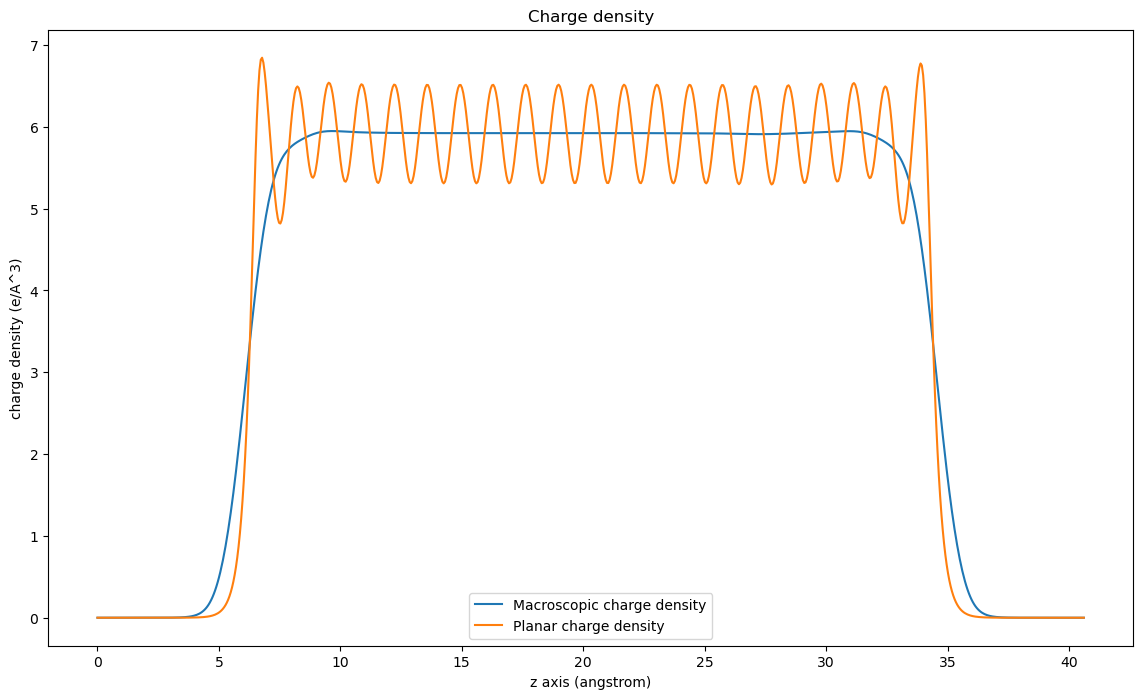

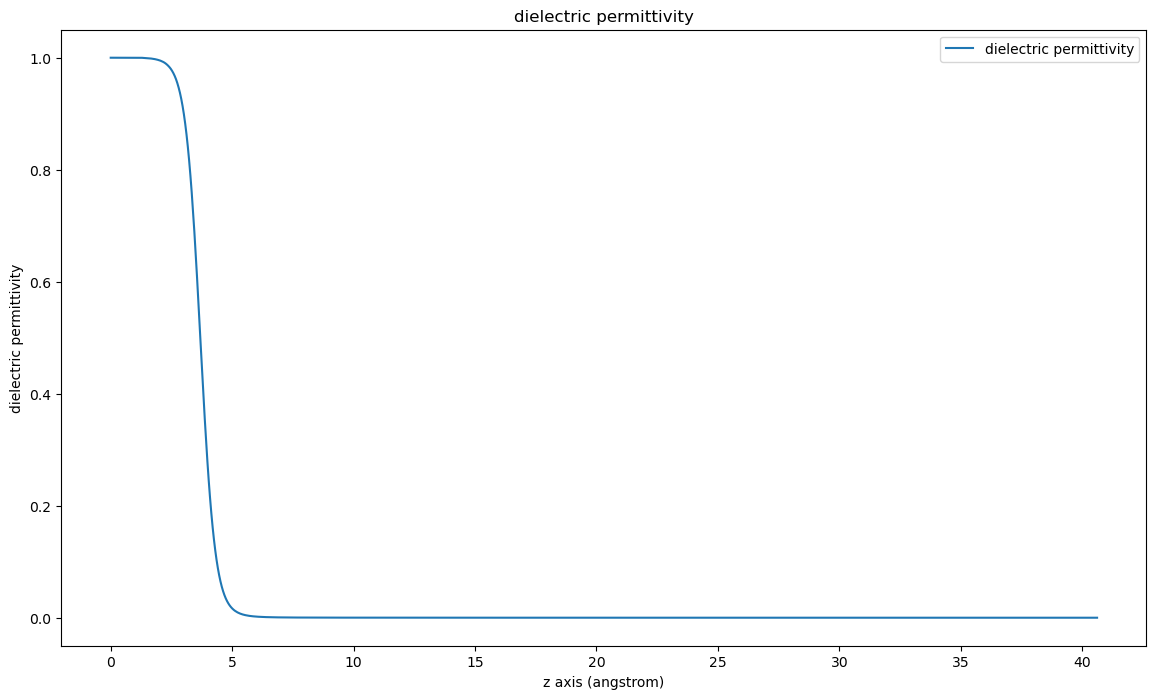

In [2]:
# For mathematical detail, see Feliciano (2005), and Ramprasad (2006).

import matplotlib.pyplot as plt
import numpy as np


def macro_charge(dat_file_path):
    """ 
    Read the gnuplot file type, difference of 1-D macroscopic average charge density file which is an output file of VASPKIT.
    
    Args:
        file_path (string): file path (.dat: output of VASPKIT) of the difference of the charge density with + E field and - E field.
        
    Returns: 
        array: an array of coordiante and corresponding macroscopic charge density and planar averaged charge density.    
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)
    
def polarization(array_data):
    """
    Read the output of macro_charge function, and integrate the induced charge density to calculate the polarization as a function of a coordinate.

    Args:
        array_data (array): An outpout of macro_charge function.

    Returns:
        list: local polarization along one-direction.
    """
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1]) 
    return polar

def permittivity(list_data):
    """
    From Ramprasad, PRB 2006.
    
    Calculate the position dependent electric permittivity using position dependent inducded polarization.

    Args:
        list_data (list): An output of position dependent induced polarization from above equation.

    Returns:
        _type_: _description_
    """
    eps0 = 0.005526349406   # e/(V*Ang)
    # eps0 = (1/(4*np.pi))
    # tot_chg = 73.445
    tot_chg = 1
    
    permitt = (0.1/tot_chg)/(0.1/tot_chg - ((1/40)*np.array(list_data)*(1/(0.529177**3))*(1/eps0)))   # The electric field is 0.05 eV/Ang
    return permitt

induced_charge = macro_charge("./VASP_files/MACROSCOPIC_AVERAGE_si-001.dat")    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)


# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Planar charge density')
# plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density (e/A^3)')
plt.title('Charge density')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 1], label='Macroscopic charge density')
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_permittivity, label='dielectric permittivity')
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend()
plt.show()

In [187]:
si_noE_test = macro_charge("./VASP_files/MACROSCOPIC_AVERAGE_test.dat")
np.sum(si_noE_test[:,1])/(18.59120952380952)

168.0

In [264]:
np.sum(si_noE_test[:,1])/(18.59120952380952)/(5.403027*5.403027*40.664379)

0.1415209912099739

In [262]:
(1.88973**3)

6.748376012323316

In [135]:
si_noE_test_CHG = macro_charge("./VASP_files/MACROSCOPIC_AVERAGE_test.dat")
np.sum(si_noE_test_CHG[:,1])*40.664379

127007.99834429278

In [40]:
# 5.403027*5.403027*40.664379*((1.88973**3))
5.403027*5.403027*40.664379

1187.103047849201

In [ ]:
si_noE_test_a = macro_charge("./VASP_files/MACROSCOPIC_AVERAGE_test_a.dat")
np.sum(si_noE_test_a[:,1])

In [ ]:
len(si_noE_test_a[:,1])

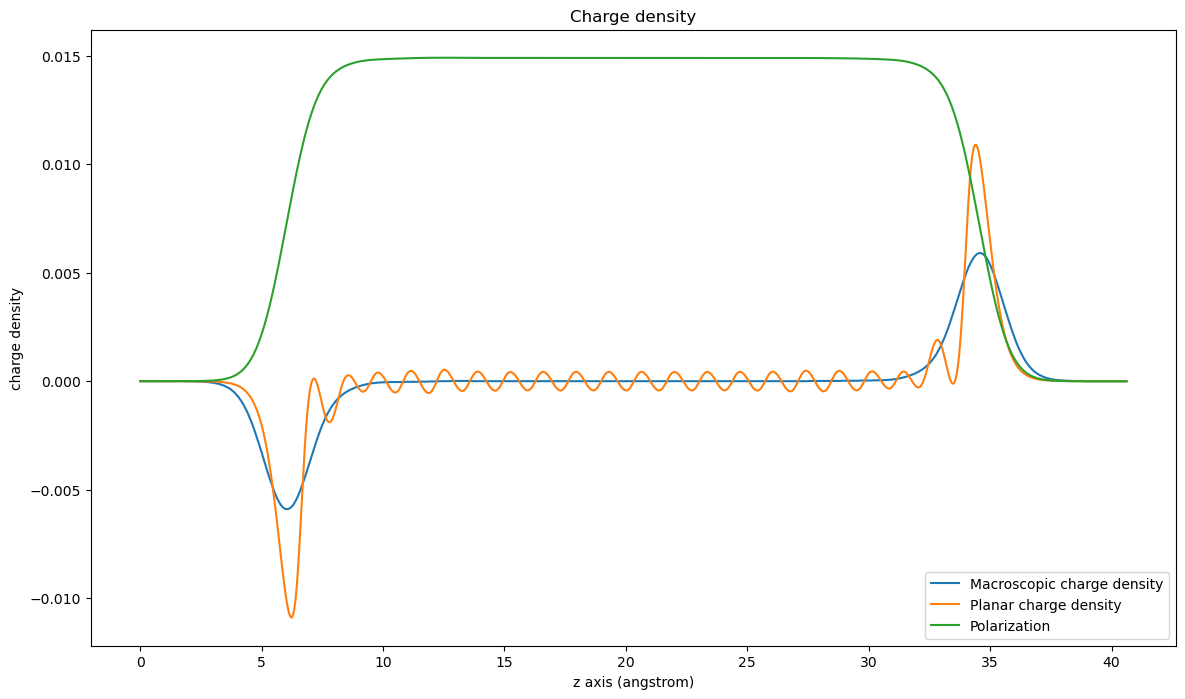

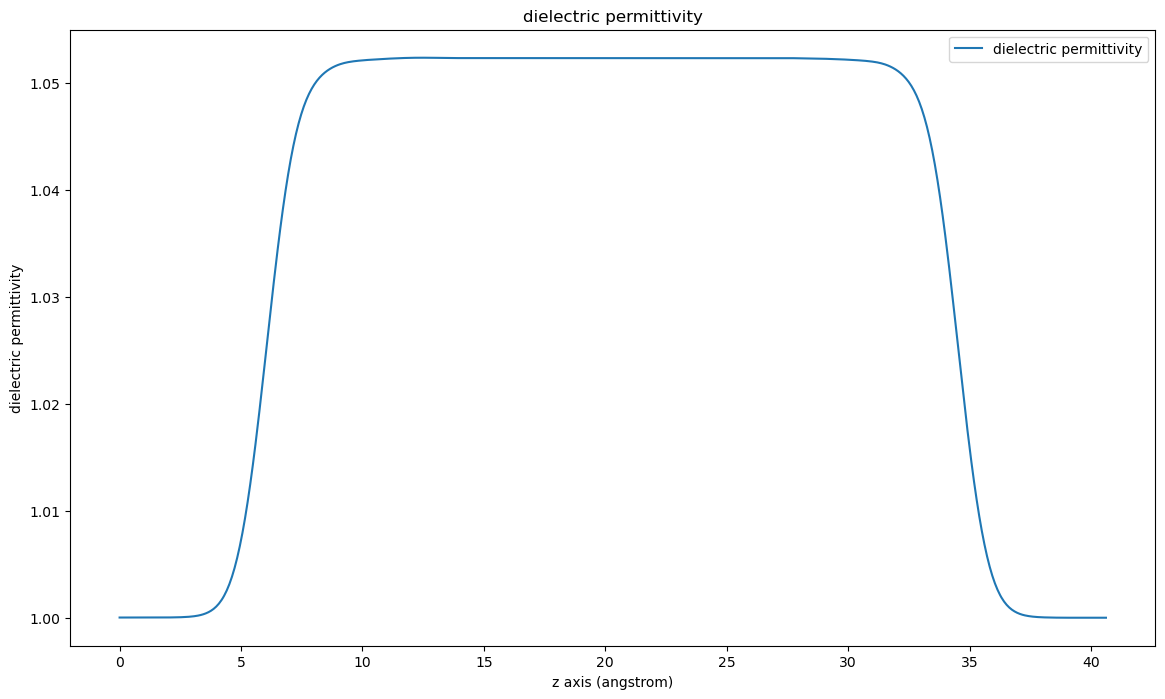

In [259]:
# For the mathematical detail, see Feliciano (2005), and Ramprasad (2006).

import matplotlib.pyplot as plt
import numpy as np


def macro_charge(dat_file_path):
    """ 
    Read the gnuplot file type, difference of 1-D macroscopic average charge density file which is an output file of VASPKIT.
    
    Args:
        file_path (string): file path (.dat: output of VASPKIT) of the difference of the charge density with + E field and - E field.
        
    Returns: 
        array: an array of coordiante and corresponding macroscopic charge density and planar averaged charge density.    
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)
    
def polarization(array_data):
    """
    Read the output of macro_charge function, and integrate the induced charge density to calculate the polarization as a function of a coordinate.

    Args:
        array_data (array): An outpout of macro_charge function.

    Returns:
        list: local polarization along one-direction.
    """
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
    return polar

def permittivity(list_data):
    """
    From Ramprasad, PRB 2006.
    
    Calculate the position dependent electric permittivity using position dependent inducded polarization.

    Args:
        list_data (list): An output of position dependent induced polarization from above equation.

    Returns:
        _type_: _description_
    """
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...
    # eps0 = (1/(4*np.pi))
    # tot_chg = 168
    # tot_chg = 1, (0.529177**3)
    
    permitt = (0.1)/(0.1 - (np.array(list_data)/(5.403027*5.403027)*(1/18.5912)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    # permitt = (0.1)/(0.1 - (0.212611*(1/eps0)))   # The electric field is 0.05 eV/Ang

    return permitt

induced_charge = macro_charge("./VASP_files/MACROSCOPIC_AVERAGE_si_001.dat")    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)


# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density')
plt.title('Charge density')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 1], label='Macroscopic charge density')
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_permittivity, label='dielectric permittivity')
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend()
plt.show()

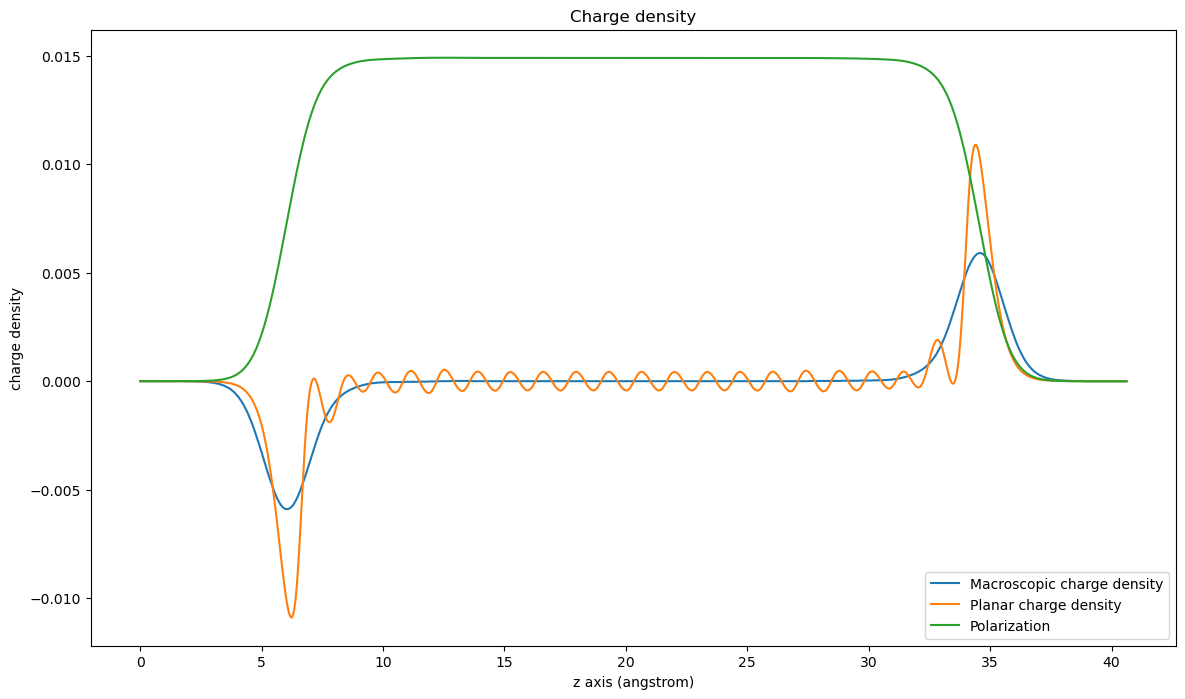

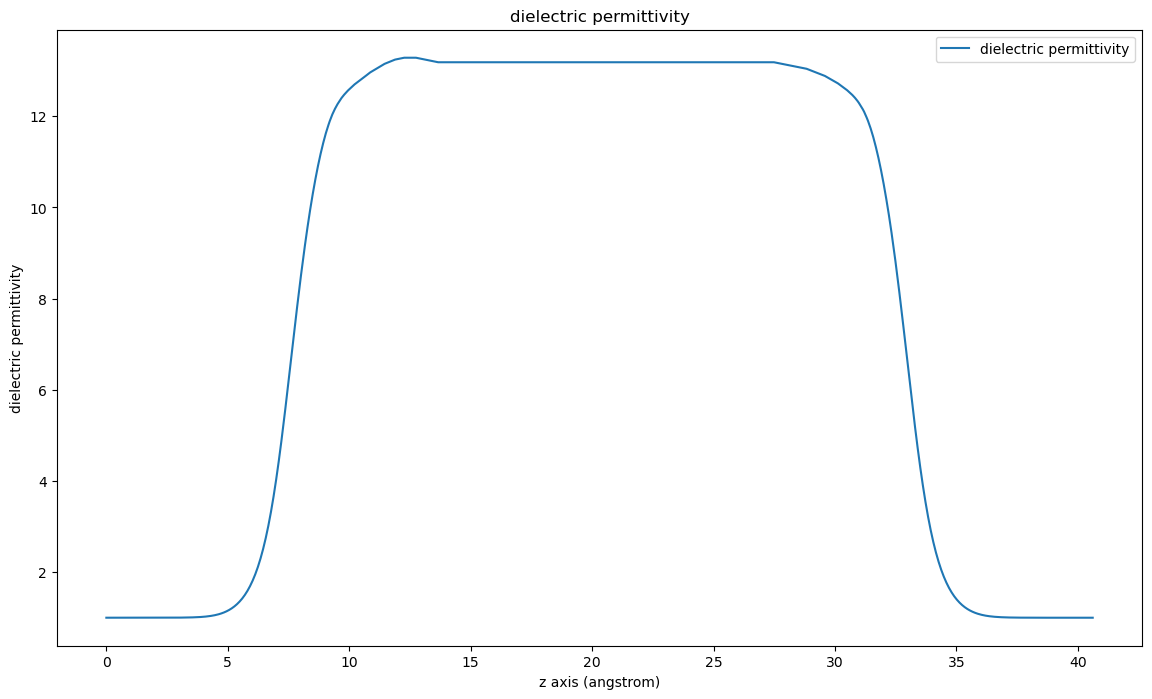

In [95]:
# For the mathematical detail, see Feliciano (2005), and Ramprasad (2006).

import matplotlib.pyplot as plt
import numpy as np


def macro_charge(dat_file_path):
    """ 
    Read the gnuplot file type, difference of 1-D macroscopic average charge density file which is an output file of VASPKIT.
    
    Args:
        file_path (string): file path (.dat: output of VASPKIT) of the difference of the charge density with + E field and - E field.
        
    Returns: 
        array: an array of coordiante and corresponding macroscopic charge density and planar averaged charge density.    
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)
    
def polarization(array_data):
    """
    Read the output of macro_charge function, and integrate the induced charge density to calculate the polarization as a function of a coordinate.

    Args:
        array_data (array): An outpout of macro_charge function.

    Returns:
        list: local polarization along one-direction.
    """
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
    return polar

def permittivity(list_data):
    """
    From Ramprasad, PRB 2006.
    
    Calculate the position dependent electric permittivity using position dependent inducded polarization.

    Args:
        list_data (list): An output of position dependent induced polarization from above equation.

    Returns:
        _type_: _description_
    """
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...
    # eps0 = (1/(4*np.pi))
    # tot_chg = 168
    # tot_chg = 1, (0.529177**3)
    
    permitt = (0.1)/(0.1 - (np.array(list_data)/(5.403027*5.403027)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    # permitt = (0.1)/(0.1 - (0.212611*(1/eps0)))   # The electric field is 0.05 eV/Ang

    return permitt

induced_charge = macro_charge("./VASP_files/MACROSCOPIC_AVERAGE_si_001.dat")    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)


# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density')
plt.title('Charge density')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 1], label='Macroscopic charge density')
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_permittivity, label='dielectric permittivity')
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend()
plt.show()

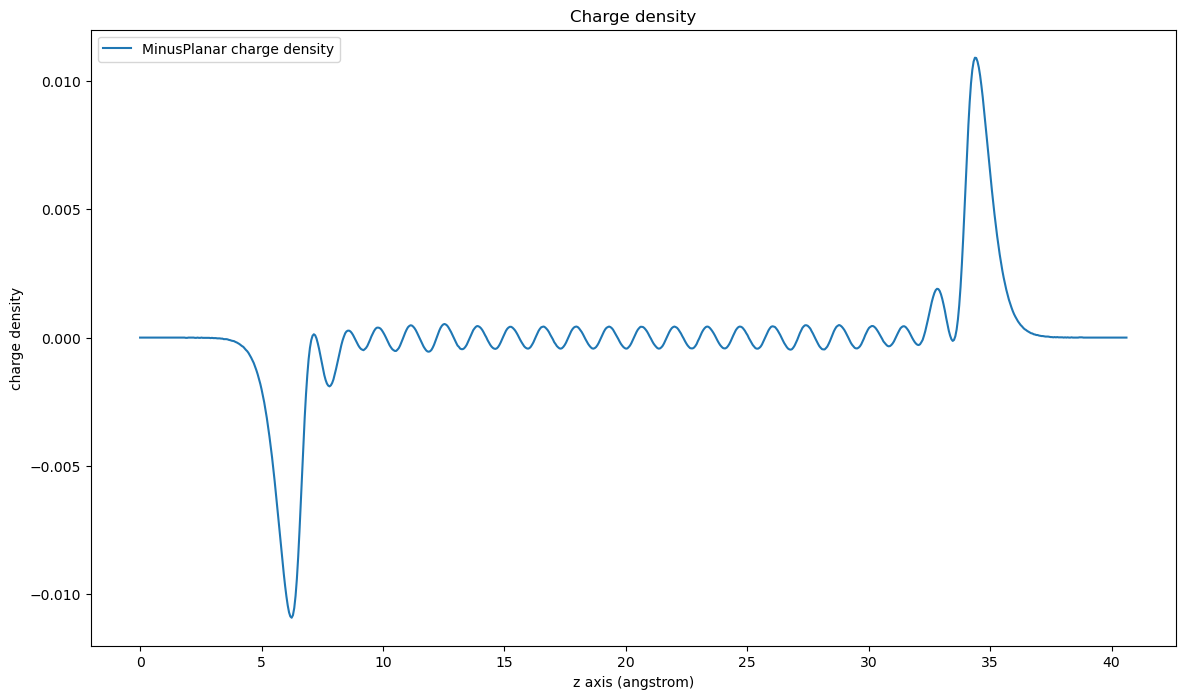

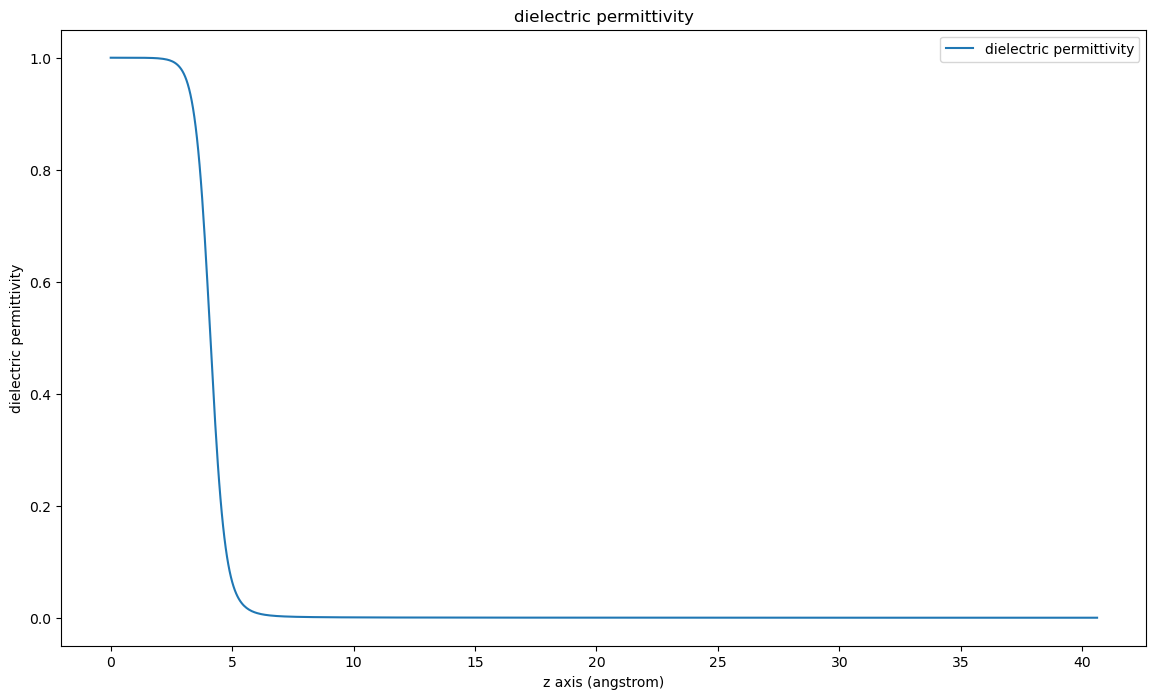

In [153]:
# For the mathematical detail, see Feliciano (2005), and Ramprasad (2006).

import matplotlib.pyplot as plt
import numpy as np


def macro_charge(dat_file_path):
    """ 
    Read the gnuplot file type, difference of 1-D macroscopic average charge density file which is an output file of VASPKIT.
    
    Args:
        file_path (string): file path (.dat: output of VASPKIT) of the difference of the charge density with + E field and - E field.
        
    Returns: 
        array: an array of coordiante and corresponding macroscopic charge density and planar averaged charge density.    
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)
    
def polarization(array_data):
    """
    Read the output of macro_charge function, and integrate the induced charge density to calculate the polarization as a function of a coordinate.

    Args:
        array_data (array): An outpout of macro_charge function.

    Returns:
        list: local polarization along one-direction.
    """
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
    return polar

def permittivity(list_data):
    """
    From Ramprasad, PRB 2006.
    
    Calculate the position dependent electric permittivity using position dependent inducded polarization.

    Args:
        list_data (list): An output of position dependent induced polarization from above equation.

    Returns:
        _type_: _description_
    """
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...
    # eps0 = (1/(4*np.pi))
    # tot_chg = 168
    # tot_chg = 1, (0.529177**3)
    
    permitt = (0.1)/(0.1 - (np.array(list_data)/(5.403027*5.403027)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    # permitt = (0.1)/(0.1 - (0.212611*(1/eps0)))   # The electric field is 0.05 eV/Ang

    return permitt

induced_charge_plus = macro_charge("./VASP_files/MACROSCOPIC_AVERAGE_Si_plus.dat")    # data in array, easy to manipulate now.
induced_charge_minus = macro_charge("./VASP_files/MACROSCOPIC_AVERAGE_Si_minus.dat")    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)


# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
# plt.plot(induced_charge_plus[:, 0], induced_charge_plus[:, 2], label='Plus Planar charge density')
# plt.plot(induced_charge_minus[:, 0], induced_charge_minus[:, 2], label='MinusPlanar charge density')
plt.plot(induced_charge_minus[:, 0], induced_charge_plus[:, 2] - induced_charge_minus[:, 2], label='MinusPlanar charge density')
# plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density')
plt.title('Charge density')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 1], label='Macroscopic charge density')
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_permittivity, label='dielectric permittivity')
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend()
plt.show()

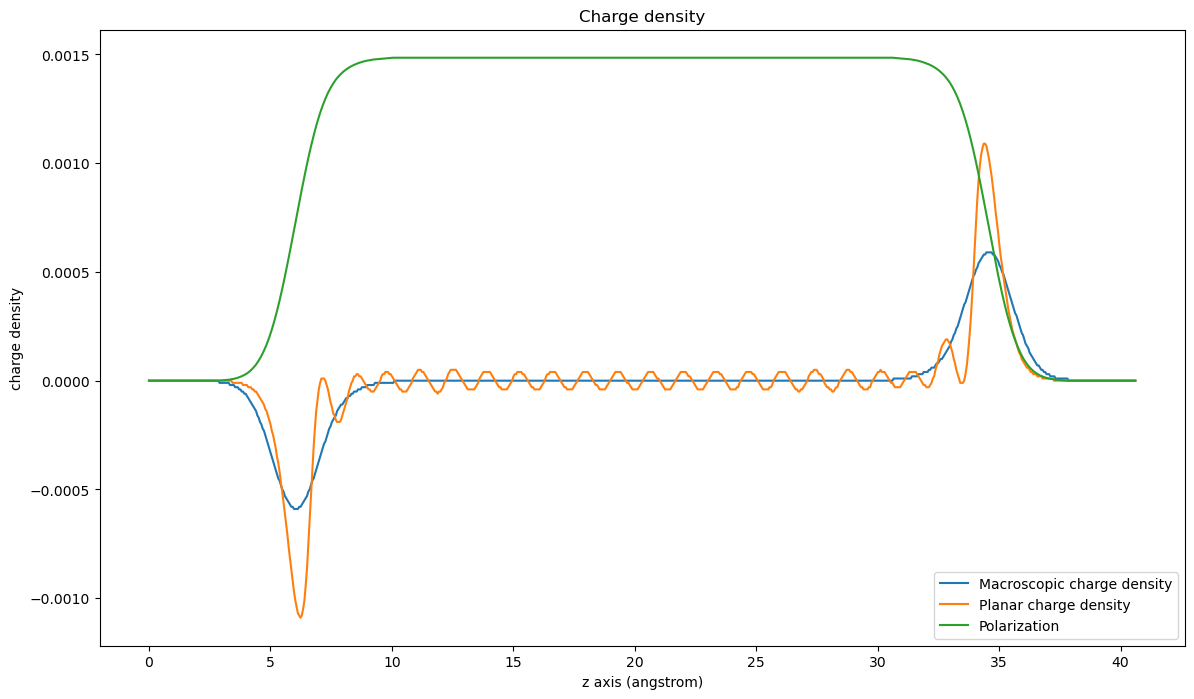

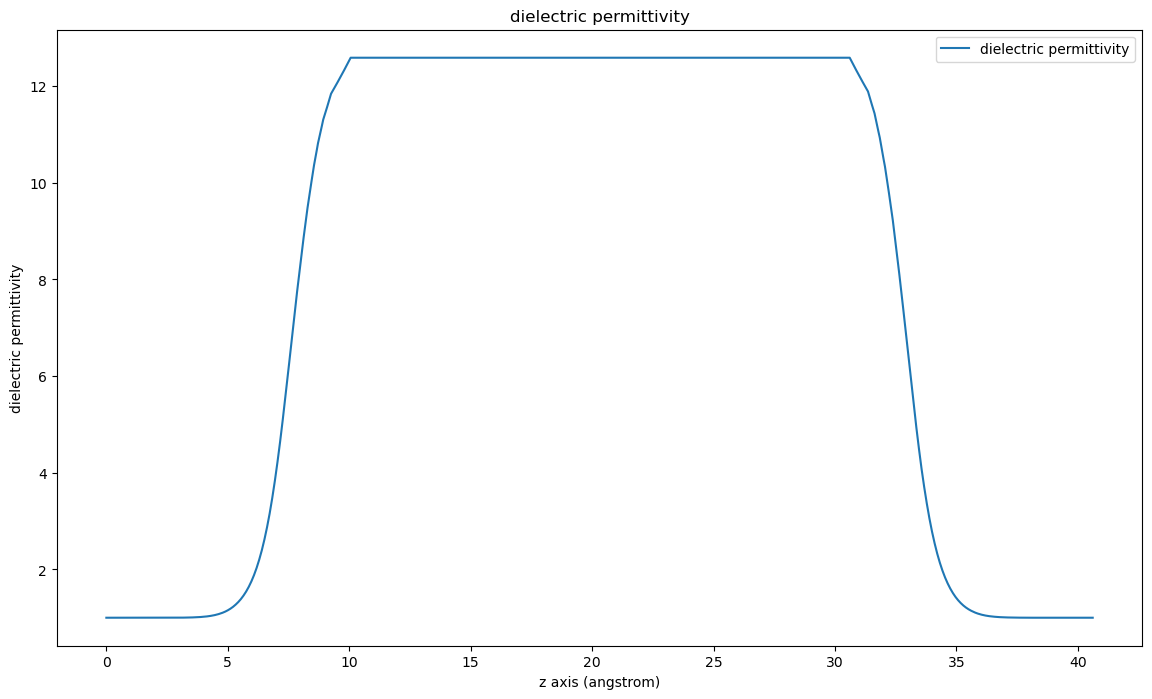

In [97]:
# For the mathematical detail, see Feliciano (2005), and Ramprasad (2006).

import matplotlib.pyplot as plt
import numpy as np


def macro_charge(dat_file_path):
    """ 
    Read the gnuplot file type, difference of 1-D macroscopic average charge density file which is an output file of VASPKIT.
    
    Args:
        file_path (string): file path (.dat: output of VASPKIT) of the difference of the charge density with + E field and - E field.
        
    Returns: 
        array: an array of coordiante and corresponding macroscopic charge density and planar averaged charge density.    
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)
    
def polarization(array_data):
    """
    Read the output of macro_charge function, and integrate the induced charge density to calculate the polarization as a function of a coordinate.

    Args:
        array_data (array): An outpout of macro_charge function.

    Returns:
        list: local polarization along one-direction.
    """
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
    return polar

def permittivity(list_data):
    """
    From Ramprasad, PRB 2006.
    
    Calculate the position dependent electric permittivity using position dependent inducded polarization.

    Args:
        list_data (list): An output of position dependent induced polarization from above equation.

    Returns:
        _type_: _description_
    """
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...
    # eps0 = (1/(4*np.pi))
    # tot_chg = 168
    # tot_chg = 1, (0.529177**3)
    
    permitt = (0.01)/(0.01 - (np.array(list_data)/(5.403027*5.403027)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    # permitt = (0.1)/(0.1 - (0.212611*(1/eps0)))   # The electric field is 0.05 eV/Ang

    return permitt

induced_charge = macro_charge("./VASP_files/MACROSCOPIC_AVERAGE_0.005.dat")    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)


# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density')
plt.title('Charge density')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 1], label='Macroscopic charge density')
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_permittivity, label='dielectric permittivity')
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend()
plt.show()

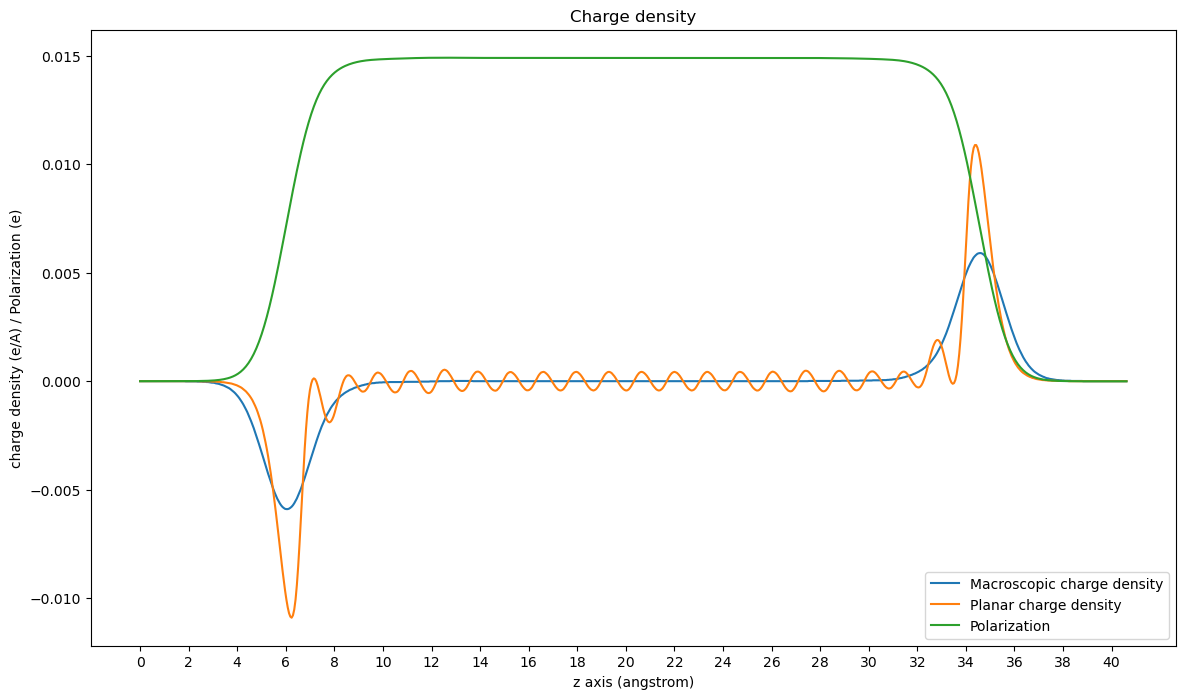

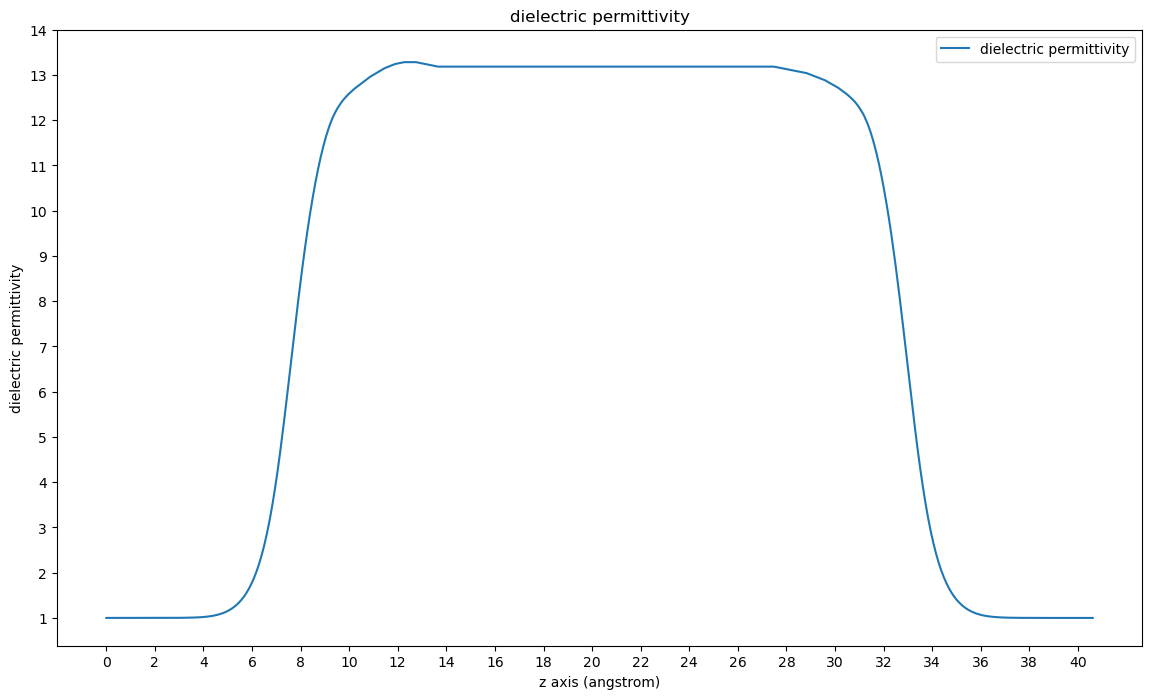

In [135]:
######################
# Still under construction...
# For the mathematical detail, see Feliciano (2005), PRB 93, 195428 (2016) and Ramprasad (2006).
# ! This is the final version of the code so far.
# TODO: How the fuck they calculate the planar charge density in the VASPKIT software.
######################
import matplotlib.pyplot as plt
import numpy as np


def macro_charge(dat_file_path):
    """ 
    Read the gnuplot file type, difference of 1-D macroscopic average charge density file which is an output file of VASPKIT.
    
    Args:
        file_path (string): file path (.dat: output of VASPKIT) of the difference of the charge density with + E field and - E field.
        
    Returns: 
        array: an array of coordiante and corresponding macroscopic charge density and planar averaged charge density.    
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)
    
def polarization(array_data):
    """
    Read the output of macro_charge function, and integrate the induced charge density to calculate the polarization as a function of a coordinate.

    Args:
        array_data (array): An outpout of macro_charge function.

    Returns:
        list: local polarization along one-direction.
    """
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
    return polar

def permittivity(list_data):
    """
    From Ramprasad, PRB 2006.
    
    Calculate the position dependent electric permittivity using position dependent inducded polarization.

    Args:
        list_data (list): An output of position dependent induced polarization from above equation.

    Returns:
        _type_: _description_
    """
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...
    # eps0 = (1/(4*np.pi))
    # tot_chg = 168
    # tot_chg = 1, (0.529177**3)
    
    permitt = (0.1)/(0.1 - (np.array(list_data)/(5.403027*5.403027)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    # permitt = (0.1)/(0.1 - (0.212611*(1/eps0)))   # The electric field is 0.05 eV/Ang

    return permitt

induced_charge = macro_charge("./VASP_files/MACROSCOPIC_AVERAGE_si_001.dat")    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)


# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density (e/A) / Polarization (e)')
plt.title('Charge density')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 1], label='Macroscopic charge density')
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.yticks(np.arange(min(induced_permittivity), max(induced_permittivity)+1, 1.0))  # Add yticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend()
plt.show()

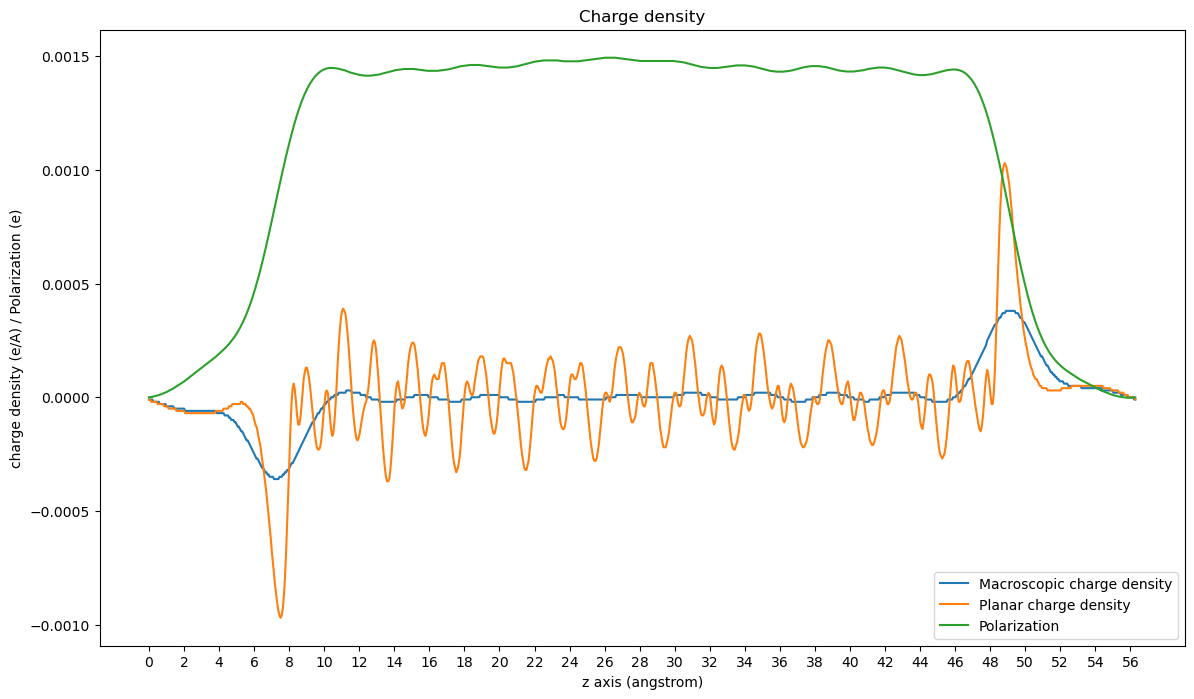

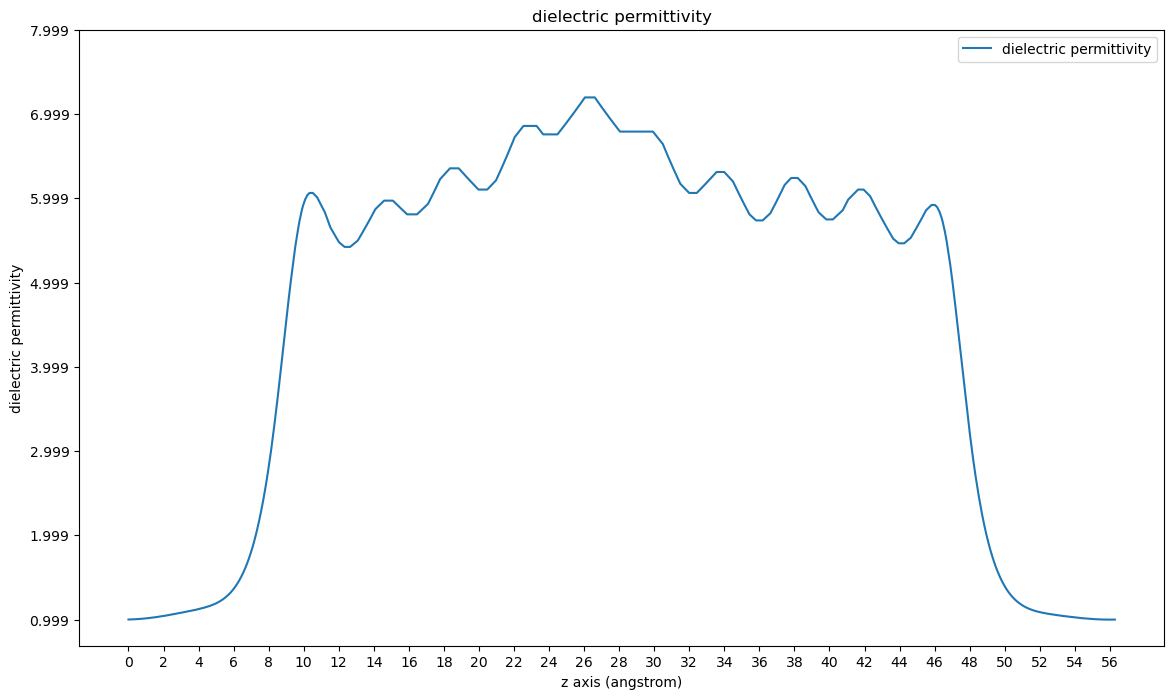

In [2]:
######################
# Still under construction...
# For the mathematical detail, see Feliciano (2005), PRB 93, 195428 (2016) and Ramprasad (2006).
# ! This is the final version of the code so far.
# TODO: How the fuck they calculate the planar charge density in the VASPKIT software.
######################
import matplotlib.pyplot as plt
import numpy as np


def macro_charge(dat_file_path):
    """ 
    Read the gnuplot file type, difference of 1-D macroscopic average charge density file which is an output file of VASPKIT.
    
    Args:
        file_path (string): file path (.dat: output of VASPKIT) of the difference of the charge density with + E field and - E field.
        
    Returns: 
        array: an array of coordiante and corresponding macroscopic charge density and planar averaged charge density.    
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)
    
def polarization(array_data):
    """
    Read the output of macro_charge function, and integrate the induced charge density to calculate the polarization as a function of a coordinate.

    Args:
        array_data (array): An outpout of macro_charge function.

    Returns:
        list: local polarization along one-direction.
    """
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
    return polar

def permittivity(list_data):
    """
    From Ramprasad, PRB 2006.
    
    Calculate the position dependent electric permittivity using position dependent inducded polarization.

    Args:
        list_data (list): An output of position dependent induced polarization from above equation.

    Returns:
        _type_: _description_
    """
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...
    # eps0 = (1/(4*np.pi))
    # tot_chg = 168
    # tot_chg = 1, (0.529177**3)
    
    permitt = (0.02)/(0.02 - (np.array(list_data)/(3.953265*3.970536)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    # permitt = (0.1)/(0.1 - (0.212611*(1/eps0)))   # The electric field is 0.05 eV/Ang

    return permitt

induced_charge = macro_charge("./VASP_files/MACROSCOPIC_AVERAGE_BTO.dat")    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)


# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density (e/A) / Polarization (e)')
plt.title('Charge density')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 1], label='Macroscopic charge density')
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.yticks(np.arange(min(induced_permittivity), max(induced_permittivity)+1, 1.0))  # Add yticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend()
plt.show()

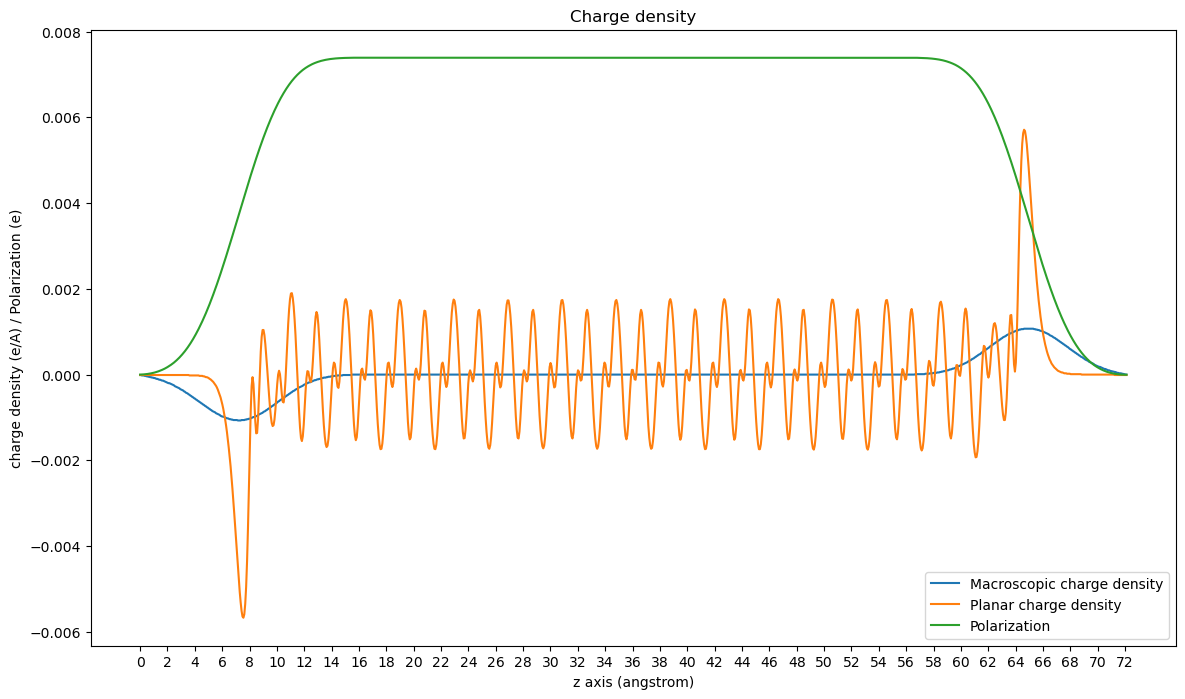

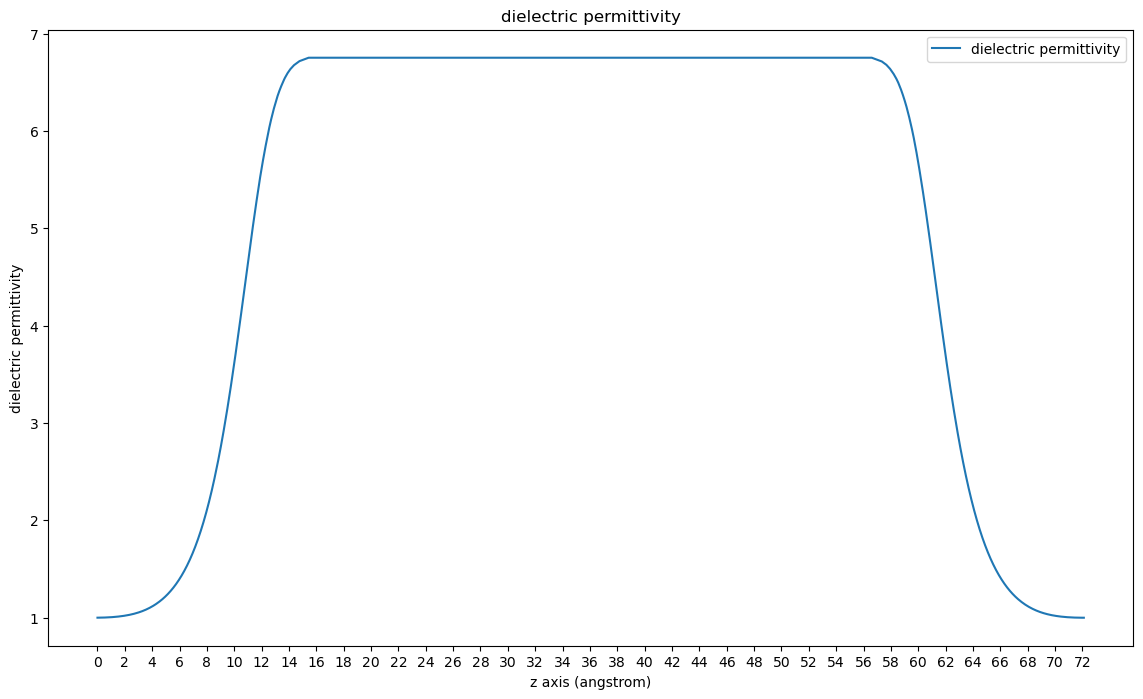

In [5]:
######################
# Still under construction...
# For the mathematical detail, see Feliciano (2005), PRB 93, 195428 (2016) and Ramprasad (2006).
# ! This is the final version of the code so far.
# TODO: How the fuck they calculate the planar charge density in the VASPKIT software.
######################
import matplotlib.pyplot as plt
import numpy as np


def macro_charge(dat_file_path):
    """ 
    Read the gnuplot file type, difference of 1-D macroscopic average charge density file which is an output file of VASPKIT.
    
    Args:
        file_path (string): file path (.dat: output of VASPKIT) of the difference of the charge density with + E field and - E field.
        
    Returns: 
        array: an array of coordiante and corresponding macroscopic charge density and planar averaged charge density.    
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)
    
def polarization(array_data):
    """
    Read the output of macro_charge function, and integrate the induced charge density to calculate the polarization as a function of a coordinate.

    Args:
        array_data (array): An outpout of macro_charge function.

    Returns:
        list: local polarization along one-direction.
    """
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
    return polar

def permittivity(list_data):
    """
    From Ramprasad, PRB 2006.
    
    Calculate the position dependent electric permittivity using position dependent inducded polarization.

    Args:
        list_data (list): An output of position dependent induced polarization from above equation.

    Returns:
        _type_: _description_
    """
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...
    # eps0 = (1/(4*np.pi))
    # tot_chg = 168
    # tot_chg = 1, (0.529177**3)
    
    permitt = (0.1)/(0.1 - (np.array(list_data)/(3.953265*3.970536)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    # permitt = (0.1)/(0.1 - (0.212611*(1/eps0)))   # The electric field is 0.05 eV/Ang

    return permitt

induced_charge = macro_charge("../VASP_files/MACROSCOPIC_AVERAGE_3.dat")    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)


# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density (e/A) / Polarization (e)')
plt.title('Charge density')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 1], label='Macroscopic charge density')
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.yticks(np.arange(min(induced_permittivity), max(induced_permittivity)+1, 1.0))  # Add yticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend()
plt.show()

In [21]:
######################
# Still under construction...
# For the mathematical detail, see Feliciano (2005), PRB 93, 195428 (2016) and Ramprasad (2006).
# ! This is the final version of the code so far.
# TODO: How the fuck they calculate the planar charge density in the VASPKIT software.
######################
import matplotlib.pyplot as plt
import numpy as np


def macro_charge(dat_file_path):
    """ 
    Read the gnuplot file type, difference of 1-D macroscopic average charge density file which is an output file of VASPKIT.
    
    Args:
        file_path (string): file path (.dat: output of VASPKIT) of the difference of the charge density with + E field and - E field.
        
    Returns: 
        array: an array of coordiante and corresponding macroscopic charge density and planar averaged charge density.    
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)
    
def polarization(array_data):
    """
    Read the output of macro_charge function, and integrate the induced charge density to calculate the polarization as a function of a coordinate.

    Args:
        array_data (array): An outpout of macro_charge function.

    Returns:
        list: local polarization along one-direction.
    """
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
    return polar

def permittivity(list_data):
    """
    From Ramprasad, PRB 2006.
    
    Calculate the position dependent electric permittivity using position dependent inducded polarization.

    Args:
        list_data (list): An output of position dependent induced polarization from above equation.

    Returns:
        _type_: _description_
    """
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...
    # eps0 = (1/(4*np.pi))
    # tot_chg = 168
    # tot_chg = 1, (0.529177**3)
    
    permitt = (0.02)/(0.02 - (np.array(list_data)/(3.953265*3.970536)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    # permitt = (0.1)/(0.1 - (0.212611*(1/eps0)))   # The electric field is 0.05 eV/Ang

    return permitt

induced_charge = macro_charge("../VASP_files/MACROSCOPIC_AVERAGE_4.dat")    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)


# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density (e/A) / Polarization (e)')
plt.title('Charge density')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 1], label='Macroscopic charge density')
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.yticks(np.arange(min(induced_permittivity), max(induced_permittivity)+1, 1.0))  # Add yticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../VASP_files/MACROSCOPIC_AVERAGE_4.dat'

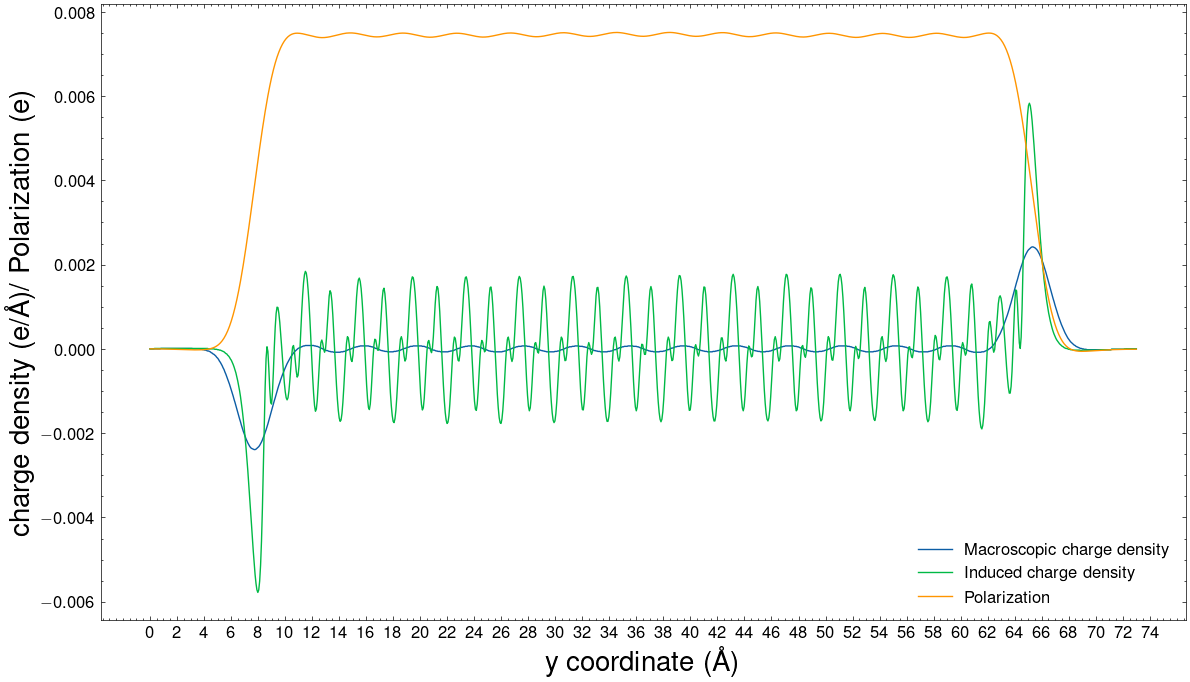

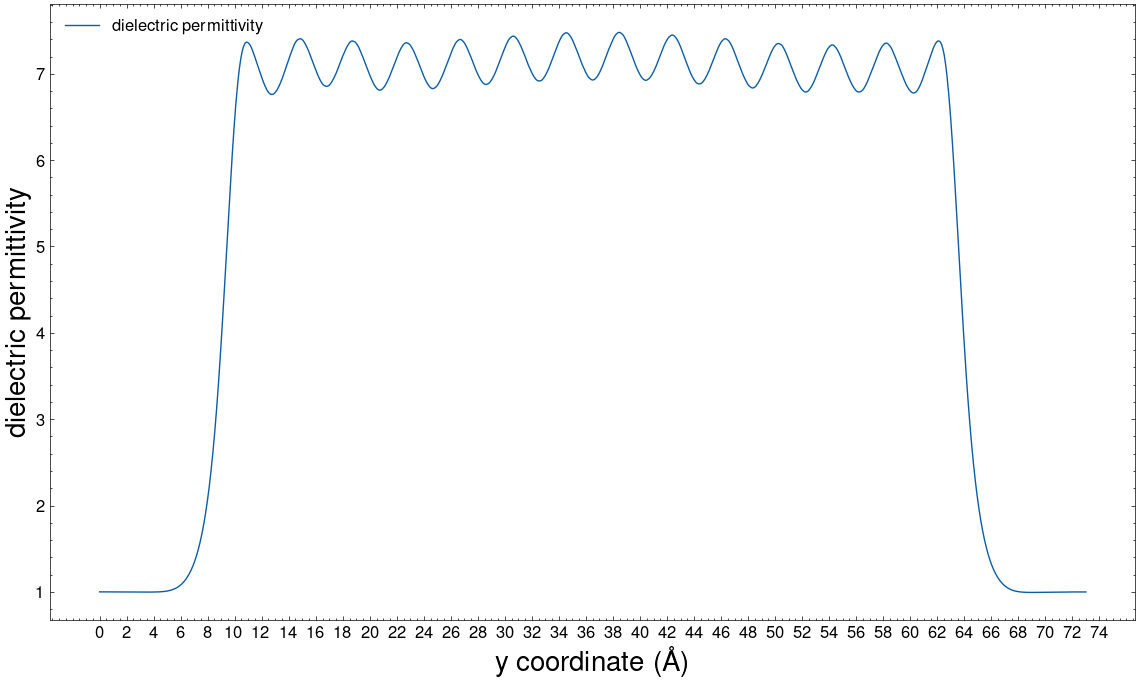

In [7]:

########################################################################################
# Still under construction...
# For the mathematical detail, see Feliciano (2005), PRB 93, 195428 (2016) and Ramprasad (2006).
# ! This is the final version of the code so far.
# TODO: How the fuck they calculate the planar charge density in the VASPKIT software.
########################################################################################
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import pymatgen.io.vasp

poscar = pymatgen.io.vasp.Poscar.from_file('POSCAR')
latt_const = np.array([poscar.structure.lattice.a, poscar.structure.lattice.b, poscar.structure.lattice.c])
area = np.sort(latt_const)[0]*np.sort(latt_const)[1]

plt.style.use(['science','nature'])

def macro_charge(dat_file_path):
    """ 
    Read the gnuplot file type, difference of 1-D macroscopic average charge density file which is an output file of VASPKIT.
    
    Args:
        file_path (string): file path (.dat: output of VASPKIT) of the difference of the charge density with + E field and - E field.
        
    Returns: 
        array: an array of coordiante and corresponding macroscopic charge density and planar averaged charge density.    
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)
    
def polarization(array_data):
    """
    Read the output of macro_charge function, and integrate the induced charge density to calculate the polarization as a function of a coordinate.

    Args:
        array_data (array): An outpout of macro_charge function.

    Returns:
        list: local polarization along one-direction.
    """
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
    return polar

def permittivity(list_data):
    """
    From Ramprasad, PRB 2006.
    
    Calculate the position dependent electric permittivity using position dependent inducded polarization.

    Args:
        list_data (list): An output of position dependent induced polarization from above equation.

    Returns:
        _type_: _description_
    """
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...

    
    permitt = (0.1)/(0.1 - (np.array(list_data)/(area)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    # permitt = (0.1)/(0.1 - (0.212611*(1/eps0)))   # The electric field is 0.05 eV/Ang
    return permitt

induced_charge = macro_charge("../VASP_files/MACROSCOPIC_AVERAGE_3.dat")    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)


plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Induced charge density')
plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
# plt.yticks(np.arange(min(induced_charge[:, 1]), max(induced_charge[:, 1])+0.001, 0.002))  # Add xticks
plt.xlabel(r'y coordinate (\AA)', fontsize=20)
plt.ylabel(r'charge density (e/\AA)'+'/ Polarization (e)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
# plt.twinx()
# plt.ylabel('Polarization (e)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
# plt.title('Charge density')
plt.legend(fontsize=12)
# plt.show()
plt.savefig('induced charge_density.png', dpi=300)

plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
plt.xlabel(r'y coordinate (\AA)', fontsize=20)
plt.ylabel('dielectric permittivity', fontsize=20)
# plt.title('dielectric permittivity')
plt.legend(fontsize=12)
# plt.show()
plt.savefig('slab_permittivity.png', dpi=300)

In [3]:

########################################################################################
# Still under construction...
# For the mathematical detail, see Feliciano (2005), PRB 93, 195428 (2016) and Ramprasad (2006).
# ! This is the final version of the code so far.
# TODO: How the fuck they calculate the planar charge density in the VASPKIT software.
########################################################################################
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import pymatgen.io.vasp

poscar = pymatgen.io.vasp.Poscar.from_file('POSCAR')
latt_const = np.array([poscar.structure.lattice.a, poscar.structure.lattice.b, poscar.structure.lattice.c])
area = np.sort(latt_const)[0]*np.sort(latt_const)[1]

plt.style.use(['science','nature'])

def macro_charge(dat_file_path):
    """ 
    Read the gnuplot file type, difference of 1-D macroscopic average charge density file which is an output file of VASPKIT.
    
    Args:
        file_path (string): file path (.dat: output of VASPKIT) of the difference of the charge density with + E field and - E field.
        
    Returns: 
        array: an array of coordiante and corresponding macroscopic charge density and planar averaged charge density.    
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)
    
def polarization(array_data):
    """
    Read the output of macro_charge function, and integrate the induced charge density to calculate the polarization as a function of a coordinate.

    Args:
        array_data (array): An outpout of macro_charge function.

    Returns:
        list: local polarization along one-direction.
    """
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
    return polar

def permittivity(list_data):
    """
    From Ramprasad, PRB 2006.
    
    Calculate the position dependent electric permittivity using position dependent inducded polarization.

    Args:
        list_data (list): An output of position dependent induced polarization from above equation.

    Returns:
        _type_: _description_
    """
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...

    
    permitt = (0.02)/(0.02 - (np.array(list_data)/(area)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    # permitt = (0.1)/(0.1 - (0.212611*(1/eps0)))   # The electric field is 0.05 eV/Ang
    return permitt

induced_charge = macro_charge("../VASP_files/MACROSCOPIC_AVERAGE_4.dat")    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)


plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Induced charge density')
plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
# plt.yticks(np.arange(min(induced_charge[:, 1]), max(induced_charge[:, 1])+0.001, 0.002))  # Add xticks
plt.xlabel(r'y coordinate (\AA)', fontsize=20)
plt.ylabel(r'charge density (e/\AA)'+'/ Polarization (e)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
# plt.twinx()
# plt.ylabel('Polarization (e)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
# plt.title('Charge density')
plt.legend(fontsize=12)
# plt.show()
plt.savefig('induced charge_density.png', dpi=300)

plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
plt.xlabel(r'x coordinate (\AA)', fontsize=20)
plt.ylabel('Dielectric permittivity', fontsize=20)
# plt.title('dielectric permittivity')
plt.legend(fontsize=12)
# plt.show()
plt.savefig('slab_permittivity.png', dpi=300)

FileNotFoundError: [Errno 2] No such file or directory: '../VASP_files/MACROSCOPIC_AVERAGE_4.dat'

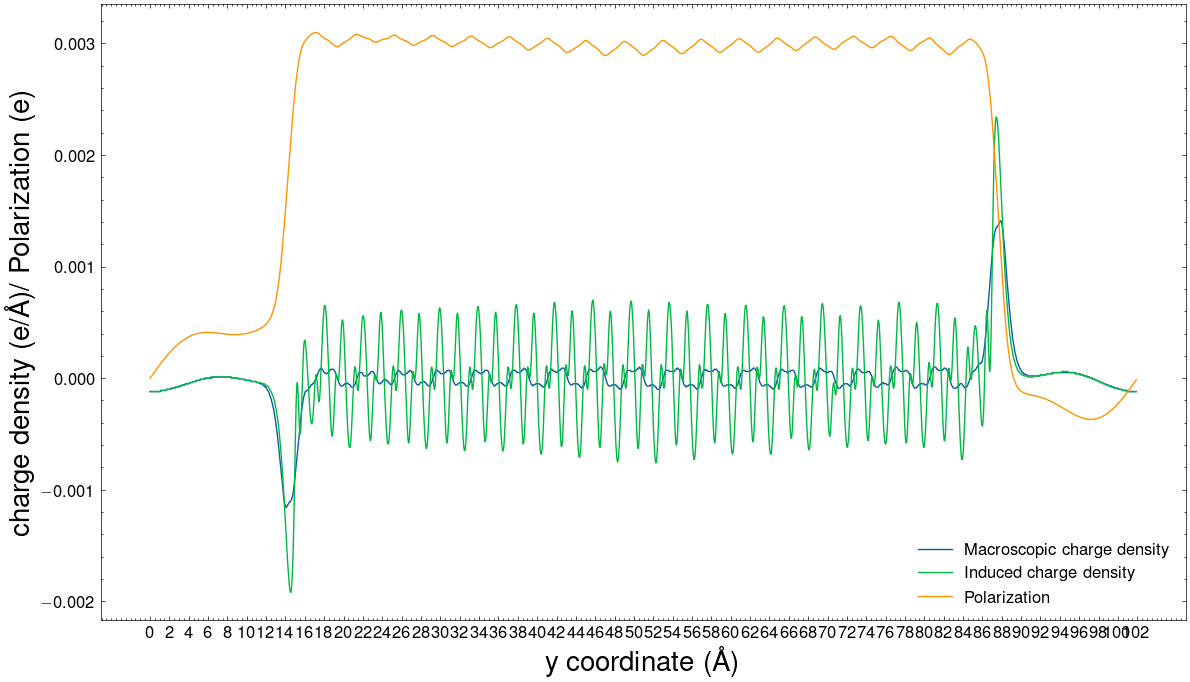

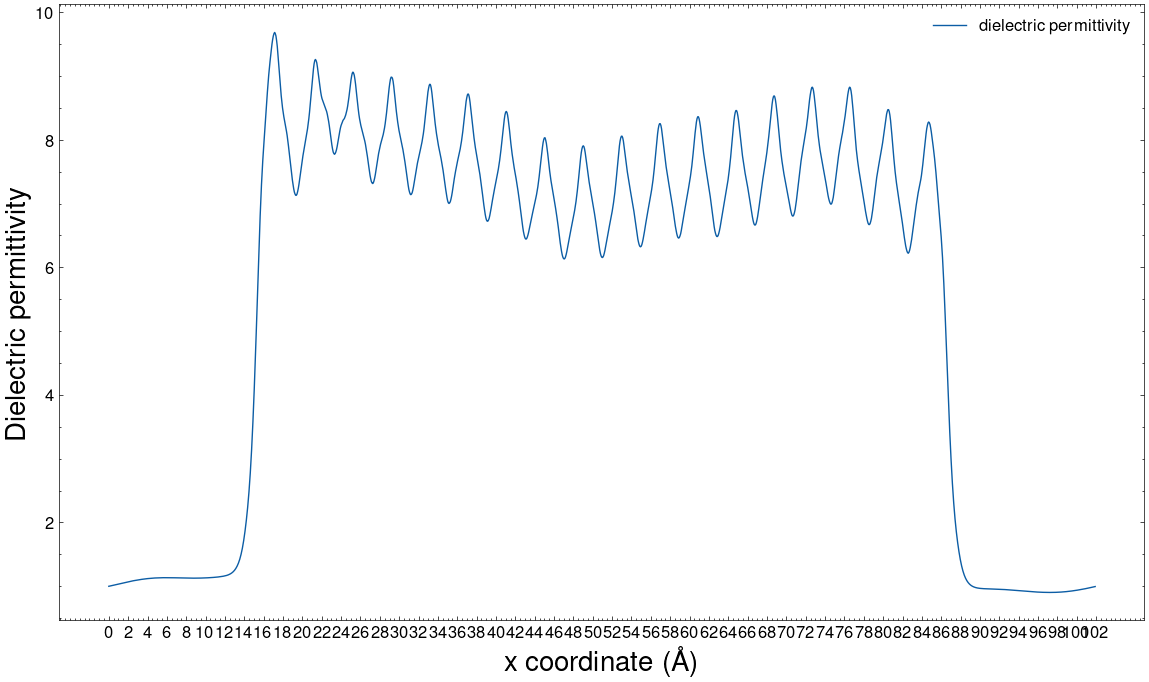

In [67]:

########################################################################################
# Still under construction...
# For the mathematical detail, see Feliciano (2005), PRB 93, 195428 (2016) and Ramprasad (2006).
# ! This is the final version of the code so far.
# TODO: How the fuck they calculate the planar charge density in the VASPKIT software.
########################################################################################
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import pymatgen.io.vasp

poscar = pymatgen.io.vasp.Poscar.from_file('POSCAR')
latt_const = np.array([poscar.structure.lattice.a, poscar.structure.lattice.b, poscar.structure.lattice.c])
area = np.sort(latt_const)[0]*np.sort(latt_const)[1]

plt.style.use(['science','nature'])

def macro_charge(dat_file_path):
    """ 
    Read the gnuplot file type, difference of 1-D macroscopic average charge density file which is an output file of VASPKIT.
    
    Args:
        file_path (string): file path (.dat: output of VASPKIT) of the difference of the charge density with + E field and - E field.
        
    Returns: 
        array: an array of coordiante and corresponding macroscopic charge density and planar averaged charge density.    
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)
    
def polarization(array_data):
    """
    Read the output of macro_charge function, and integrate the induced charge density to calculate the polarization as a function of a coordinate.

    Args:
        array_data (array): An outpout of macro_charge function.

    Returns:
        list: local polarization along one-direction.
    """
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
    return polar

def permittivity(list_data):
    """
    From Ramprasad, PRB 2006.
    
    Calculate the position dependent electric permittivity using position dependent inducded polarization.

    Args:
        list_data (list): An output of position dependent induced polarization from above equation.

    Returns:
        _type_: _description_
    """
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...

    
    permitt = (0.04)/(0.04 - (np.array(list_data)/(area)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    # permitt = (0.1)/(0.1 - (0.212611*(1/eps0)))   # The electric field is 0.05 eV/Ang
    return permitt

induced_charge = macro_charge("../VASP_files/MACROSCOPIC_AVERAGE_8.dat")    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)


plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Induced charge density')
plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
# plt.yticks(np.arange(min(induced_charge[:, 1]), max(induced_charge[:, 1])+0.001, 0.002))  # Add xticks
plt.xlabel(r'y coordinate (\AA)', fontsize=20)
plt.ylabel(r'charge density (e/\AA)'+'/ Polarization (e)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
# plt.twinx()
# plt.ylabel('Polarization (e)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
# plt.title('Charge density')
plt.legend(fontsize=12)
# plt.show()
plt.savefig('induced charge_density.png', dpi=300)

plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
plt.xlabel(r'x coordinate (\AA)', fontsize=20)
plt.ylabel('Dielectric permittivity', fontsize=20)
# plt.title('dielectric permittivity')
plt.legend(fontsize=12)
# plt.show()
plt.savefig('slab_permittivity.png', dpi=300)

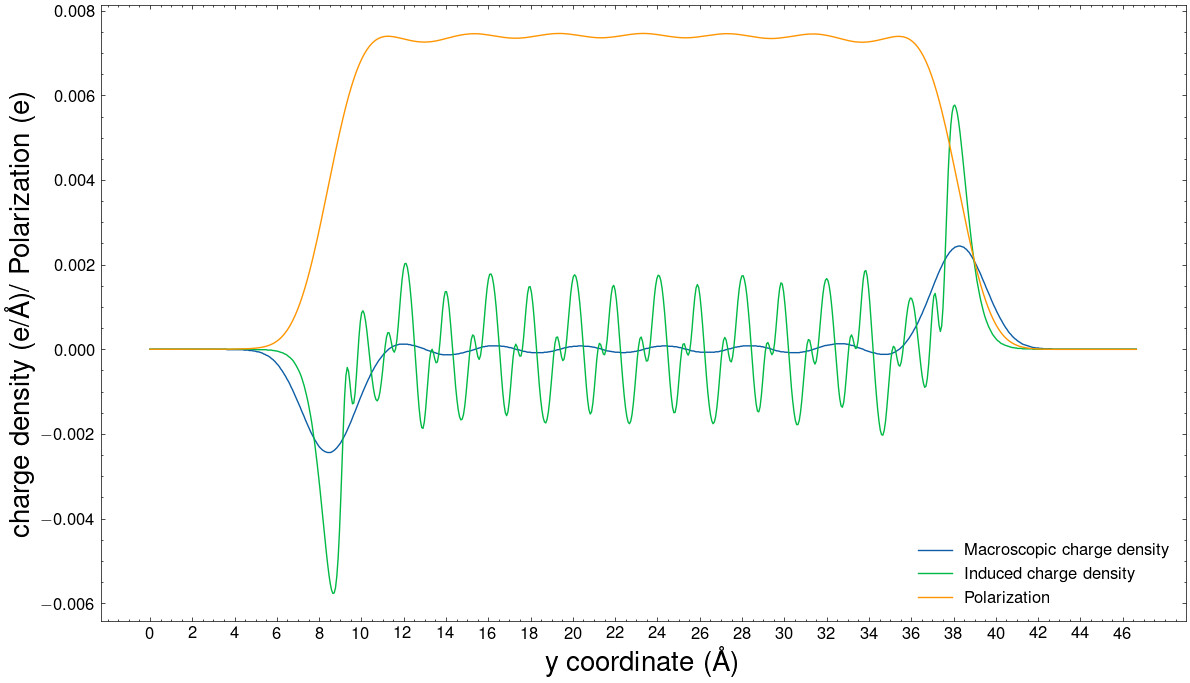

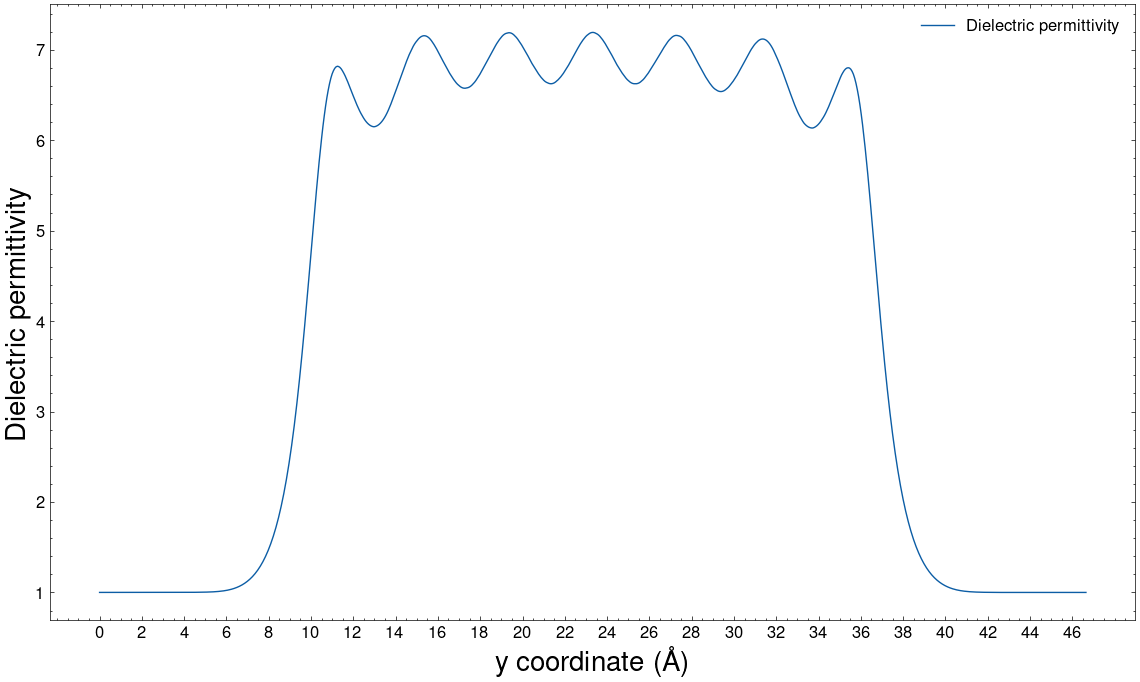

In [2]:

########################################################################################
# Still under construction...
# For the mathematical detail, see Feliciano (2005), PRB 93, 195428 (2016) and Ramprasad (2006).
# ! This is the final version of the code so far.
# TODO: How the fuck they calculate the planar charge density in the VASPKIT software.
########################################################################################
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import pymatgen.io.vasp

poscar = pymatgen.io.vasp.Poscar.from_file('POSCAR')
latt_const = np.array([poscar.structure.lattice.a, poscar.structure.lattice.b, poscar.structure.lattice.c])
area = np.sort(latt_const)[0]*np.sort(latt_const)[1]

plt.rc('text', usetex=True)
plt.style.use(['science','nature'])

def macro_charge(dat_file_path):
    """ 
    Read the gnuplot file type, difference of 1-D macroscopic average charge density file which is an output file of VASPKIT.
    
    Args:
        file_path (string): file path (.dat: output of VASPKIT) of the difference of the charge density with + E field and - E field.
        
    Returns: 
        array: an array of coordiante and corresponding macroscopic charge density and planar averaged charge density.    
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)
    
def polarization(array_data):
    """
    Read the output of macro_charge function, and integrate the induced charge density to calculate the polarization as a function of a coordinate.

    Args:
        array_data (array): An outpout of macro_charge function.

    Returns:
        list: local polarization along one-direction.
    """
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
    return polar

def permittivity(list_data):
    """
    From Ramprasad, PRB 2006.
    
    Calculate the position dependent electric permittivity using position dependent inducded polarization.

    Args:
        list_data (list): An output of position dependent induced polarization from above equation.

    Returns:
        _type_: _description_
    """
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...

    
    permitt = (0.1)/(0.1 - (np.array(list_data)/(area)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    # permitt = (0.1)/(0.1 - (0.212611*(1/eps0)))   # The electric field is 0.05 eV/Ang
    return permitt

induced_charge = macro_charge("../VASP_files/MACROSCOPIC_AVERAGE.dat")    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)


plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Induced charge density')
plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
# plt.yticks(np.arange(min(induced_charge[:, 1]), max(induced_charge[:, 1])+0.001, 0.002))  # Add xticks
plt.xlabel(r'y coordinate (\AA)', fontsize=20)
plt.ylabel(r'charge density (e/\AA)'+'/ Polarization (e)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
# plt.twinx()
# plt.ylabel('Polarization (e)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
# plt.title('Charge density')
plt.legend(fontsize=12)
plt.savefig('induced charge_density.png', dpi=300)

plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_permittivity, label='Dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
plt.xlabel(r'y coordinate (\AA)', fontsize=20)
plt.ylabel('Dielectric permittivity', fontsize=20)
# plt.title('dielectric permittivity')
plt.legend(fontsize=12)
plt.savefig('slab_permittivity.png', dpi=300)


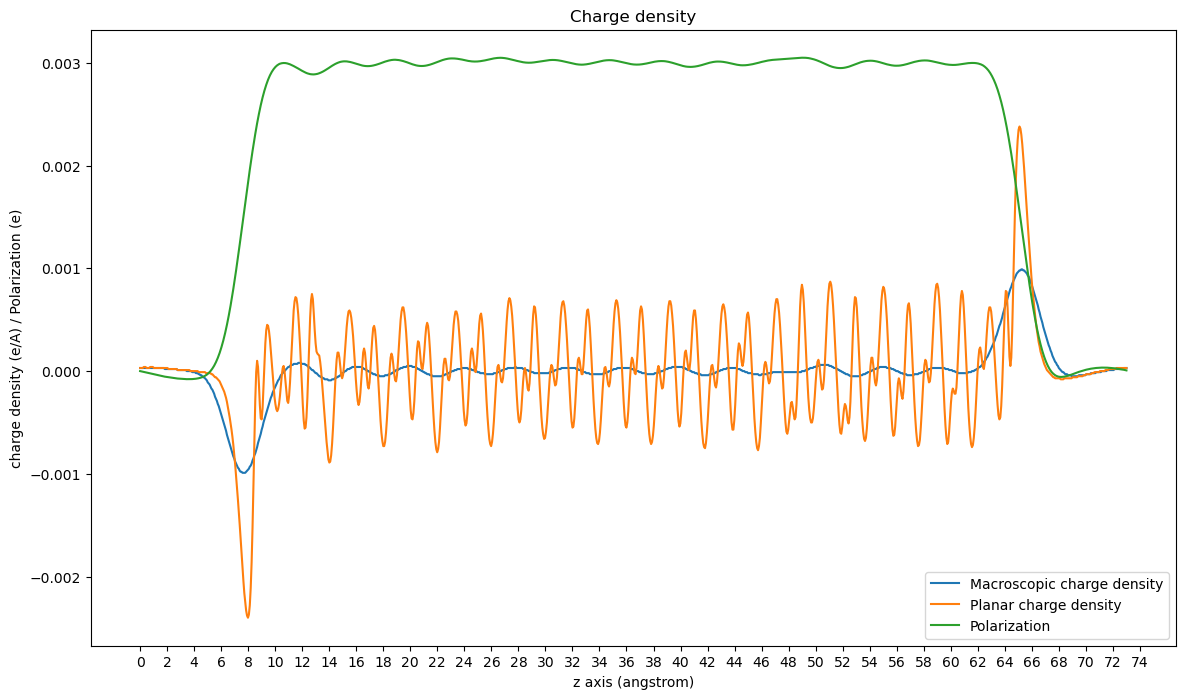

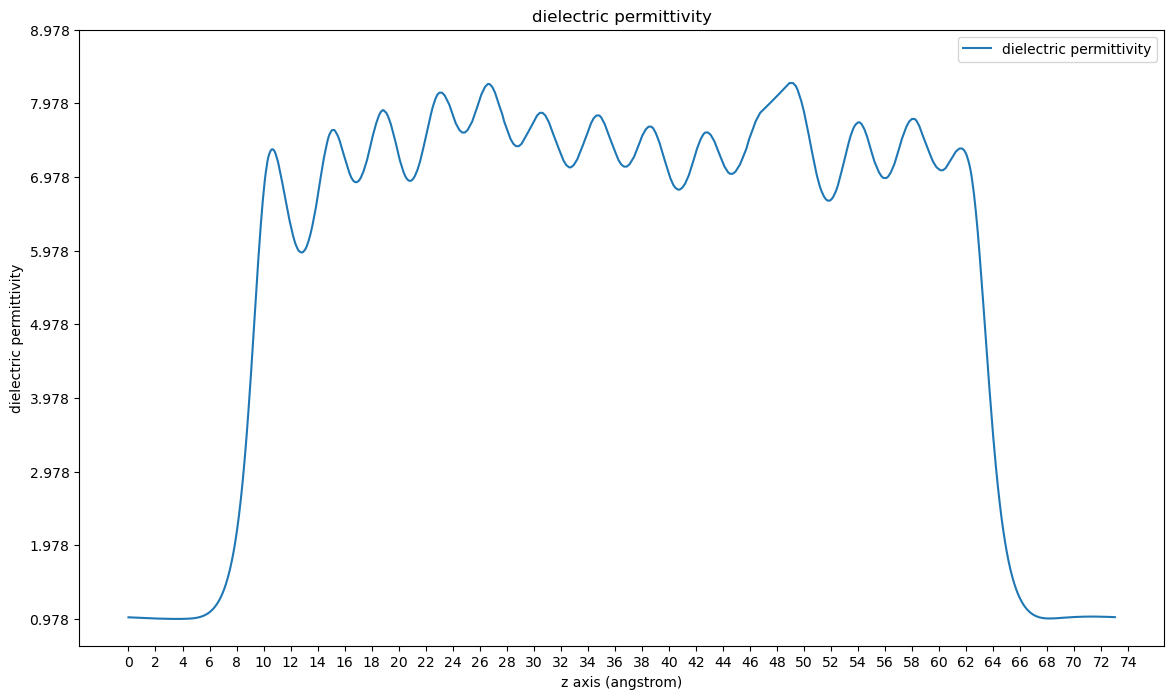

In [17]:
######################
# Still under construction...
# For the mathematical detail, see Feliciano (2005), PRB 93, 195428 (2016) and Ramprasad (2006).
# ! This is the final version of the code so far.
# TODO: How the fuck they calculate the planar charge density in the VASPKIT software.
######################
import matplotlib.pyplot as plt
import numpy as np


def macro_charge(dat_file_path):
    """ 
    Read the gnuplot file type, difference of 1-D macroscopic average charge density file which is an output file of VASPKIT.
    
    Args:
        file_path (string): file path (.dat: output of VASPKIT) of the difference of the charge density with + E field and - E field.
        
    Returns: 
        array: an array of coordiante and corresponding macroscopic charge density and planar averaged charge density.    
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)
    
def polarization(array_data):
    """
    Read the output of macro_charge function, and integrate the induced charge density to calculate the polarization as a function of a coordinate.

    Args:
        array_data (array): An outpout of macro_charge function.

    Returns:
        list: local polarization along one-direction.
    """
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
    return polar

def permittivity(list_data):
    """
    From Ramprasad, PRB 2006.
    
    Calculate the position dependent electric permittivity using position dependent inducded polarization.

    Args:
        list_data (list): An output of position dependent induced polarization from above equation.
    
    Returns:
        _type_: _description_
    """
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...
    # eps0 = (1/(4*np.pi))
    # tot_chg = 168
    # tot_chg = 1, (0.529177**3)
    
    permitt = (0.04)/(0.04 - (np.array(list_data)/(3.953265*3.970536)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    # permitt = (0.1)/(0.1 - (0.212611*(1/eps0)))   # The electric field is 0.05 eV/Ang

    return permitt

induced_charge = macro_charge("./files/MACROSCOPIC_AVERAGE_0.02.dat")    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)


# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density (e/A) / Polarization (e)')
plt.title('Charge density')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 1], label='Macroscopic charge density')
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.yticks(np.arange(min(induced_permittivity), max(induced_permittivity)+1, 1.0))  # Add yticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend()
plt.show()

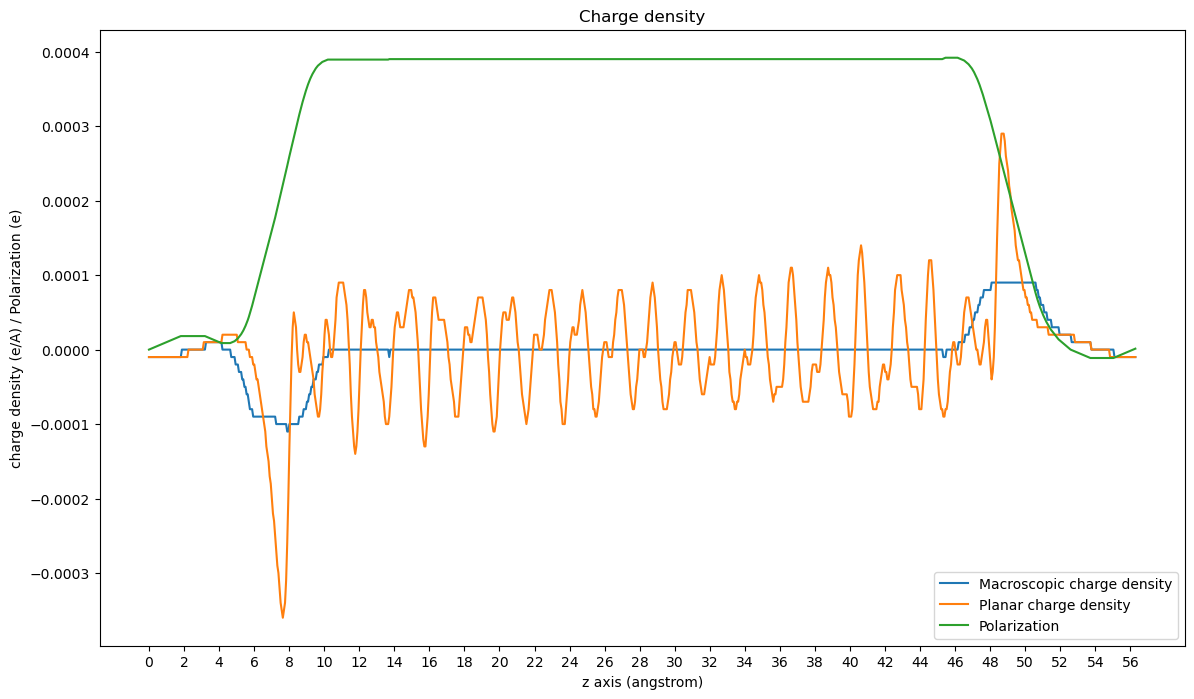

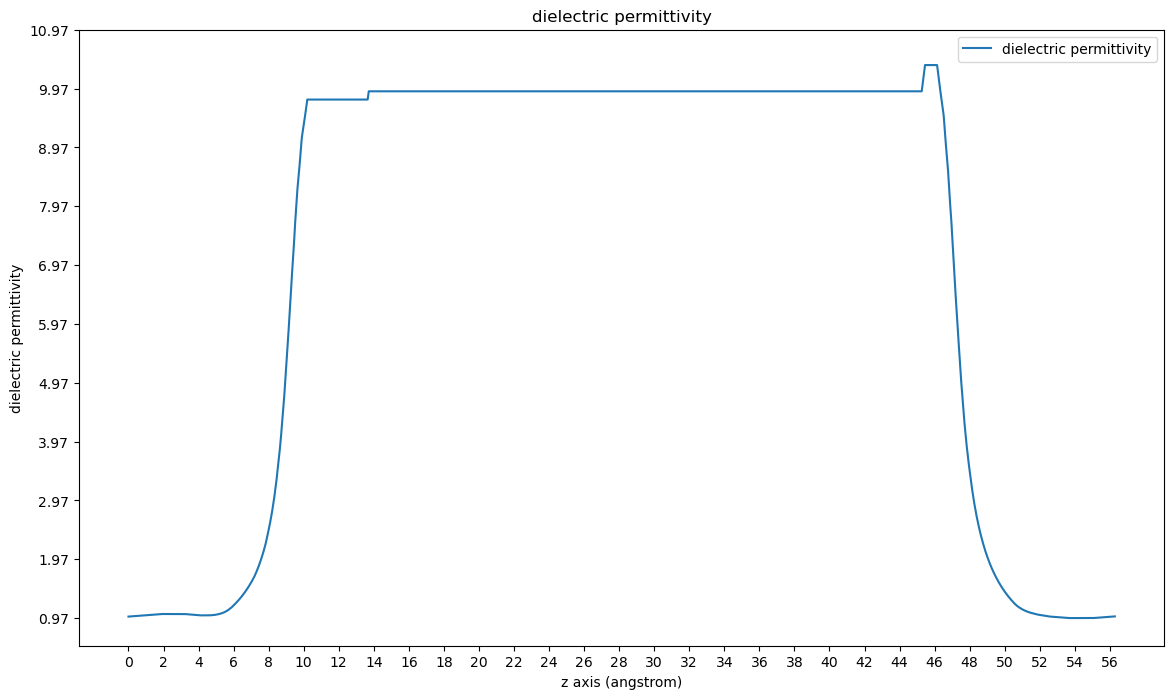

In [63]:
######################
# Still under construction...
# For the mathematical detail, see Feliciano (2005), PRB 93, 195428 (2016) and Ramprasad (2006).
# ! This is the final version of the code so far.
# TODO: How the fuck they calculate the planar charge density in the VASPKIT software.
######################
import matplotlib.pyplot as plt
import numpy as np


def macro_charge(dat_file_path):
    """ 
    Read the gnuplot file type, difference of 1-D macroscopic average charge density file which is an output file of VASPKIT.
    
    Args:
        file_path (string): file path (.dat: output of VASPKIT) of the difference of the charge density with + E field and - E field.
        
    Returns: 
        array: an array of coordiante and corresponding macroscopic charge density and planar averaged charge density.    
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)
    
def polarization(array_data):
    """
    Read the output of macro_charge function, and integrate the induced charge density to calculate the polarization as a function of a coordinate.

    Args:
        array_data (array): An outpout of macro_charge function.

    Returns:
        list: local polarization along one-direction.
    """
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
    return polar

def permittivity(list_data):
    """
    From Ramprasad, PRB 2006.
    
    Calculate the position dependent electric permittivity using position dependent inducded polarization.

    Args:
        list_data (list): An output of position dependent induced polarization from above equation.
    
    Returns:
        _type_: _description_
    """
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...
    # eps0 = (1/(4*np.pi))
    # tot_chg = 168
    # tot_chg = 1, (0.529177**3)
    
    permitt = (0.005)/(0.005 - (np.array(list_data)/(3.953265*3.970536)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    # permitt = (0.1)/(0.1 - (0.212611*(1/eps0)))   # The electric field is 0.05 eV/Ang

    return permitt

induced_charge = macro_charge("./files/MACROSCOPIC_AVERAGE.dat")    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)


# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density (e/A) / Polarization (e)')
plt.title('Charge density')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 1], label='Macroscopic charge density')
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.yticks(np.arange(min(induced_permittivity), max(induced_permittivity)+1, 1.0))  # Add yticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend()
plt.show()

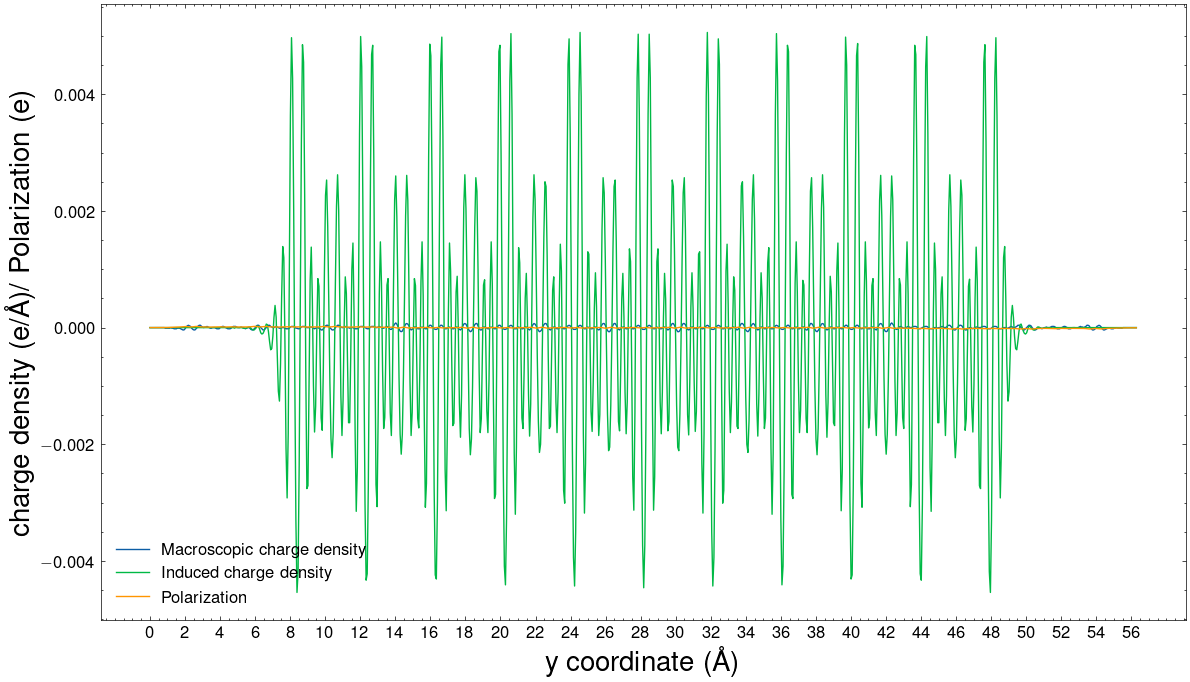

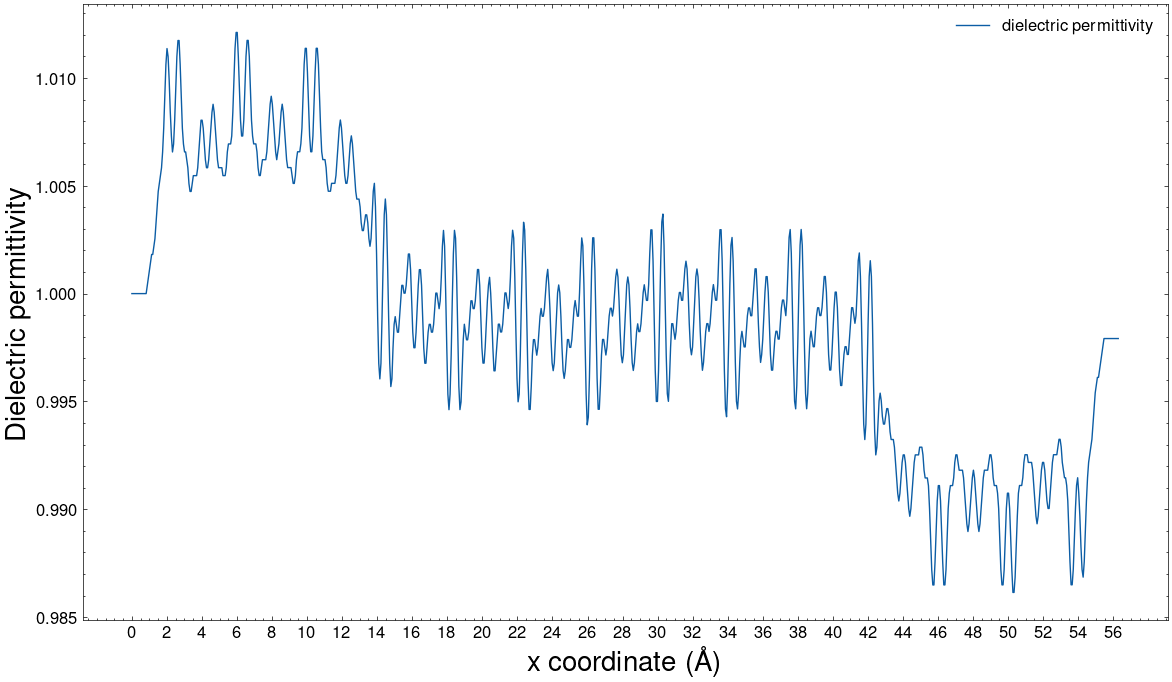

In [70]:

########################################################################################
# Still under construction...
# For the mathematical detail, see Feliciano (2005), PRB 93, 195428 (2016) and Ramprasad (2006).
# ! This is the final version of the code so far.
# TODO: How the fuck they calculate the planar charge density in the VASPKIT software.
########################################################################################
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import pymatgen.io.vasp

poscar = pymatgen.io.vasp.Poscar.from_file('POSCAR')
latt_const = np.array([poscar.structure.lattice.a, poscar.structure.lattice.b, poscar.structure.lattice.c])
area = np.sort(latt_const)[0]*np.sort(latt_const)[1]

plt.style.use(['science','nature'])

def macro_charge(dat_file_path):
    """ 
    Read the gnuplot file type, difference of 1-D macroscopic average charge density file which is an output file of VASPKIT.
    
    Args:
        file_path (string): file path (.dat: output of VASPKIT) of the difference of the charge density with + E field and - E field.
        
    Returns: 
        array: an array of coordiante and corresponding macroscopic charge density and planar averaged charge density.    
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)
    
def polarization(array_data):
    """
    Read the output of macro_charge function, and integrate the induced charge density to calculate the polarization as a function of a coordinate.

    Args:
        array_data (array): An outpout of macro_charge function.

    Returns:
        list: local polarization along one-direction.
    """
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
    return polar

def permittivity(list_data):
    """
    From Ramprasad, PRB 2006.
    
    Calculate the position dependent electric permittivity using position dependent inducded polarization.

    Args:
        list_data (list): An output of position dependent induced polarization from above equation.

    Returns:
        _type_: _description_
    """
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...

    
    permitt = (0.02)/(0.02 - (np.array(list_data)/(area)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    # permitt = (0.1)/(0.1 - (0.212611*(1/eps0)))   # The electric field is 0.05 eV/Ang
    return permitt

induced_charge = macro_charge("../VASP_files/MACROSCOPIC_AVERAGE_no_dip.dat")    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)


plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Induced charge density')
plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
# plt.yticks(np.arange(min(induced_charge[:, 1]), max(induced_charge[:, 1])+0.001, 0.002))  # Add xticks
plt.xlabel(r'y coordinate (\AA)', fontsize=20)
plt.ylabel(r'charge density (e/\AA)'+'/ Polarization (e)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
# plt.twinx()
# plt.ylabel('Polarization (e)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
# plt.title('Charge density')
plt.legend(fontsize=12)
# plt.show()
plt.savefig('induced charge_density.png', dpi=300)

plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
plt.xlabel(r'x coordinate (\AA)', fontsize=20)
plt.ylabel('Dielectric permittivity', fontsize=20)
# plt.title('dielectric permittivity')
plt.legend(fontsize=12)
# plt.show()
plt.savefig('slab_permittivity.png', dpi=300)

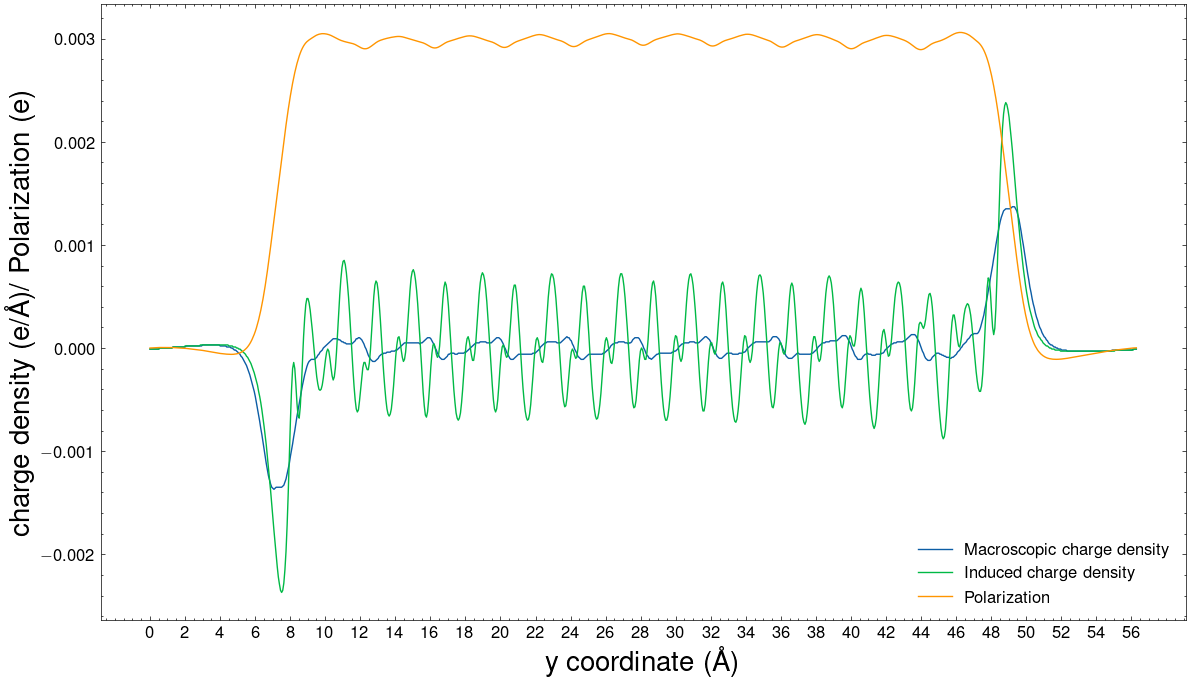

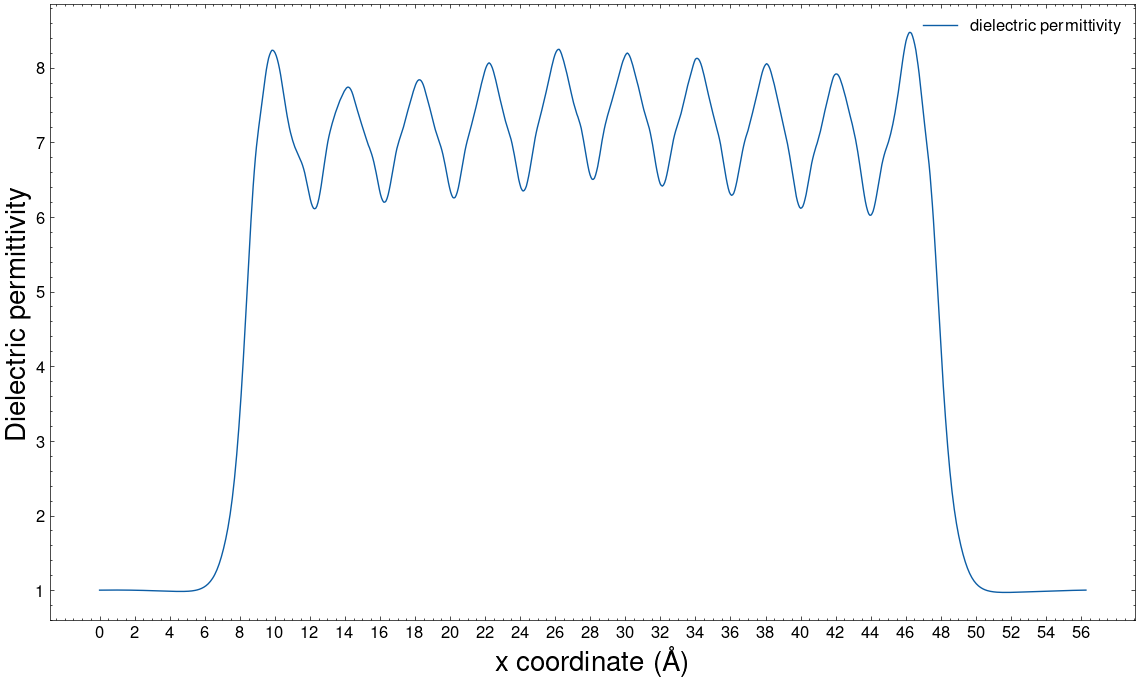

In [46]:

########################################################################################
# Still under construction...
# For the mathematical detail, see Feliciano (2005), PRB 93, 195428 (2016) and Ramprasad (2006).
# ! This is the final version of the code so far.
# TODO: How the fuck they calculate the planar charge density in the VASPKIT software.
########################################################################################
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import pymatgen.io.vasp

poscar = pymatgen.io.vasp.Poscar.from_file('POSCAR')
latt_const = np.array([poscar.structure.lattice.a, poscar.structure.lattice.b, poscar.structure.lattice.c])
area = np.sort(latt_const)[0] * np.sort(latt_const)[2]

plt.style.use(['science','nature'])

def macro_charge(dat_file_path):
    """ 
    Read the gnuplot file type, difference of 1-D macroscopic average charge density file which is an output file of VASPKIT.
    
    Args:
        file_path (string): file path (.dat: output of VASPKIT) of the difference of the charge density with + E field and - E field.
        
    Returns: 
        array: an array of coordiante and corresponding macroscopic charge density and planar averaged charge density.    
    """
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)
    
def polarization(array_data):
    """
    Read the output of macro_charge function, and integrate the induced charge density to calculate the polarization as a function of a coordinate.

    Args:
        array_data (array): An outpout of macro_charge function.

    Returns:
        list: local polarization along one-direction.
    """
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
    return polar

def permittivity(list_data):
    """
    From Ramprasad, PRB 2006.
    
    Calculate the position dependent electric permittivity using position dependent inducded polarization.

    Args:
        list_data (list): An output of position dependent induced polarization from above equation.

    Returns:
        _type_: _description_
    """
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...

    
    permitt = (0.04)/(0.04 - (np.array(list_data)/(area)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    # permitt = (0.1)/(0.1 - (0.212611*(1/eps0)))   # The electric field is 0.05 eV/Ang
    return permitt

induced_charge = macro_charge("../VASP_files/MACROSCOPIC_AVERAGE.dat")    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)


plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Induced charge density')
plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
# plt.yticks(np.arange(min(induced_charge[:, 1]), max(induced_charge[:, 1])+0.001, 0.002))  # Add xticks
plt.xlabel(r'y coordinate (\AA)', fontsize=20)
plt.ylabel(r'charge density (e/\AA)'+'/ Polarization (e)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
# plt.twinx()
# plt.ylabel('Polarization (e)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
# plt.title('Charge density')
plt.legend(fontsize=12)
# plt.show()
plt.savefig('induced charge_density.png', dpi=300)

plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick number size
plt.xlabel(r'x coordinate (\AA)', fontsize=20)
plt.ylabel('Dielectric permittivity', fontsize=20)
# plt.title('dielectric permittivity')
plt.legend(fontsize=12)
# plt.show()
plt.savefig('slab_permittivity.png', dpi=300)